# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
sns.set_context('poster')
sns.set_style("whitegrid")

In [2]:
sns.__version__

'0.9.0'

In [57]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'
win = 3

# load data
net_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/network_stats.csv', index_col=0)
node_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/node_stats.csv', index_col=0)

# drop duplicates
net_data.drop_duplicates(inplace=True)
node_data.drop_duplicates(inplace=True)

Check the data

In [58]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec    31     -0.133605      0.205105          0.722994   
2   alpha_aec_ortho    31     -0.266868      0.244967          1.335172   
3         alpha_coh    31      0.596591     -0.096290          2.012777   
4         alpha_plv    31      1.061606     -0.396287          0.867141   
5          beta_aec    31     -0.734011      0.311263         -0.384572   
6    beta_aec_ortho    31     -0.825025      0.410064          0.251016   
7          beta_coh    31      0.120619     -0.186861         -0.476384   
8          beta_plv    31      0.982558     -0.671838         -0.411437   
9      broadband_ar    31      0.032004     -0.317615         -0.658765   
10  broadband_xcorr    31     -0.557955      0.451641         -0.793322   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1          -0.229935              0.375618            0.632687   
2          -0.464655              0.405644           -0.333550   
3          -0.773642             -0.019574           -0.382194   
4          -0.355811             -0.406102           -0.445757   
5           0.044770              0.327214            0.493246   
6          -0.329531              0.409028            0.356208   
7           0.013619             -0.217409           -0.308289   
8           0.406029             -0.973710           -0.654687   
9           0.227660             -0.310350            0.536807   
10          0.372990              0.457138            0.591186   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.523083           -1.164885                0.046213   
2              -0.665320            0.605898               -0.451818   
3               0.392733            0.992726                0.530720   
4               1.011739            0.786417                1.009142   
5              -0.752992           -0.940060               -0.691420   
6              -0.783231           -0.734114               -0.993441   
7               0.323055            0.007530                0.176653   
8               1.159945            0.836759                0.801339   
9               0.072335           -1.668351                0.617284   
10             -0.558959           -1.800536               -0.421287   

   fc_measure  str_not_spike_beta_num       band    subj hand   age gender  \
1         aec                0.120901      alpha  R1170J    R  20.0      M   
2   aec_ortho                0.353651      alpha  R1170J    R  20.0      M   
3         coh               -0.081514      alpha  R1170J    R  20.0      M   
4         plv               -0.315543      alpha  R1170J    R  20.0      M   
5         aec                0.278217       beta  R1170J    R  20.0      M   
6   aec_ortho                0.526971       beta  R1170J    R  20.0      M   
7         coh               -0.144452       beta  R1170J    R  20.0      M   
8         plv               -0.529787       beta  R1170J    R  20.0      M   
9          ar               -0.545579  broadband  R1170J    R  20.0      M   
10      xcorr                0.440214  broadband  R1170J    R  20.0      M   

    race  
1    2.0  
2    2.0  
3    2.0  
4    2.0  
5    2.0  
6    2.0  
7    2.0  
8    2.0  
9    2.0  
10   2.0

In [59]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4011 entries, 1 to 4074
Data columns (total 19 columns):
band_measure              4011 non-null object
n_tp                      4011 non-null int64
str_beta_bin              3885 non-null float64
str_beta_num              3884 non-null float64
str_soz_beta_bin          2814 non-null float64
str_soz_beta_num          2814 non-null float64
str_not_soz_beta_num      2802 non-null float64
str_spike_beta_num        2667 non-null float64
str_not_soz_beta_bin      2802 non-null float64
str_spike_beta_bin        2667 non-null float64
str_not_spike_beta_bin    2657 non-null float64
fc_measure                4011 non-null object
str_not_spike_beta_num    2657 non-null float64
band                      4011 non-null object
subj                      4011 non-null object
hand                      3927 non-null object
age                       3969 non-null float64
gender                    3990 non-null object
race                      3843 non-nu

In [60]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  4011.000000   3885.000000   3884.000000       2814.000000   
mean    377.958115     -0.265878      0.155949         -0.223773   
std     450.068822      1.421357      0.697500          1.287742   
min       4.000000    -22.129038     -5.856505        -15.548312   
25%      84.000000     -0.630951     -0.057861         -0.609482   
50%     206.000000     -0.188769      0.110218         -0.214671   
75%     520.000000      0.113580      0.371614          0.106418   
max    2336.000000     11.924982     14.674848         14.800992   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       2814.000000           2802.000000         2667.000000   
mean           0.158417              0.136650            0.176862   
std            0.606389              0.574856            0.782753   
min           -6.877165             -5.746986          -23.343151   
25%           -0.045404             -0.064558           -0.032618   
50%            0.122880              0.086716            0.137614   
75%            0.373876              0.337173            0.408075   
max           10.293814             15.243082           11.454204   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           2802.000000         2667.000000             2657.000000   
mean              -0.220003           -0.257215               -0.231963   
std                1.127162            1.471125                1.136486   
min              -19.701828          -16.085755              -19.286761   
25%               -0.581561           -0.649842               -0.570318   
50%               -0.161351           -0.233493               -0.159059   
75%                0.128056            0.093298                0.139734   
max                8.537691           30.677274               11.144318   

       str_not_spike_beta_num          age         race  
count             2657.000000  3969.000000  3843.000000  
mean                 0.142738    35.761905     2.983607  
std                  0.569443    11.946327     1.221443  
min                 -5.033340     0.000000     1.000000  
25%                 -0.067049    26.000000     2.000000  
50%                  0.085722    34.000000     4.000000  
75%                  0.331916    44.000000     4.000000  
max                 14.959196    66.000000     7.000000

In [61]:
node_data.head(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  str_soz_beta_bin  \
1   L1AG1        alpha_aec    31         0.0            0         -0.524759   
2   L1AG1  alpha_aec_ortho    31         0.0            0          1.850213   
3   L1AG1        alpha_coh    31         0.0            0          0.670910   
4   L1AG1        alpha_plv    31         0.0            0          0.260909   
5   L1AG1         beta_aec    31         0.0            0         -0.337572   
6   L1AG1   beta_aec_ortho    31         0.0            0          0.620129   
7   L1AG1         beta_coh    31         0.0            0          0.152951   
8   L1AG1         beta_plv    31         0.0            0          0.099164   
9   L1AG1     broadband_ar    31         0.0            0         -0.466158   
10  L1AG1  broadband_xcorr    31         0.0            0         -0.784667   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -2.095338           -0.617635               -2.058161   
2               0.684487            0.284193                0.917955   
3               0.464399           -0.987955                0.752971   
4               0.610182            0.199155                0.725362   
5              -2.258640           -0.258339               -1.885696   
6               0.507380           -0.136991                0.576760   
7              -0.595707           -0.665131               -0.417050   
8              -0.496501           -0.302441               -0.380314   
9              -0.546285           -1.817750                0.029277   
10             -1.095327           -2.212830               -0.919885   

    str_beta_bin  ...             region       x        y          z  type  \
1      -2.165058  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
2       0.943259  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
3       0.600020  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
4       0.739744  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
5      -1.908405  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
6       0.500052  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
7      -0.534402  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
8      -0.411201  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
9      -0.570373  ...   inferiorparietal -40.988 -50.1327  17.177778     D   
10     -1.059204  ...   inferiorparietal -40.988 -50.1327  17.177778     D   

      subj hand   age  gender  race  
1   R1170J    R  20.0       M   2.0  
2   R1170J    R  20.0       M   2.0  
3   R1170J    R  20.0       M   2.0  
4   R1170J    R  20.0       M   2.0  
5   R1170J    R  20.0       M   2.0  
6   R1170J    R  20.0       M   2.0  
7   R1170J    R  20.0       M   2.0  
8   R1170J    R  20.0       M   2.0  
9   R1170J    R  20.0       M   2.0  
10  R1170J    R  20.0       M   2.0  

[10 rows x 27 columns]

In [62]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409227 entries, 1 to 418530
Data columns (total 27 columns):
elec                      409227 non-null object
band_measure              409227 non-null object
n_tp                      409227 non-null int64
elec_spike                409227 non-null float64
elec_in_soz               409227 non-null int64
str_soz_beta_bin          280056 non-null float64
str_not_soz_beta_bin      257982 non-null float64
str_spike_beta_bin        263655 non-null float64
str_not_spike_beta_bin    233577 non-null float64
str_beta_bin              392154 non-null float64
str_soz_beta_num          280056 non-null float64
str_not_soz_beta_num      257982 non-null float64
str_spike_beta_num        263544 non-null float64
str_beta_num              391310 non-null float64
str_not_spike_beta_num    233521 non-null float64
fc_measure                409227 non-null object
band                      409227 non-null object
region                    369117 non-null objec

In [63]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  409227.000000  409227.000000  409227.000000     280056.000000   
mean      350.247447       0.050582       0.058039         -0.106099   
std       427.748398       0.097738       0.233817          3.257788   
min         3.000000       0.000000       0.000000       -353.747146   
25%        65.000000       0.000000       0.000000         -0.422371   
50%       194.000000       0.010227       0.000000         -0.090203   
75%       450.000000       0.051948       0.000000          0.192901   
max      2336.000000       1.000000       1.000000        601.654664   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         257982.000000       263655.000000           233577.000000   
mean              -0.140037           -0.133660               -0.131211   
std                2.832234            3.249137                3.337767   
min             -399.220003         -397.858091             -370.035097   
25%               -0.465911           -0.474561               -0.474452   
50%               -0.108341           -0.103735               -0.106773   
75%                0.165691            0.187277                0.174073   
max              261.497058          473.405206              665.303973   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  392154.000000     280056.000000         257982.000000   
mean       -0.164005          0.078462              0.098153   
std         3.129191          1.880276              1.586039   
min      -422.563260       -278.232996           -279.187590   
25%        -0.505658         -0.076487             -0.065015   
50%        -0.123365          0.052258              0.067313   
75%         0.167417          0.231994              0.267189   
max       601.654664        368.386002            206.755220   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       263544.000000  391310.000000           233521.000000   
mean             0.094983       0.117848                0.096487   
std              1.942218       2.384354                1.858458   
min           -231.643672    -278.232996             -339.459000   
25%             -0.075009      -0.064484               -0.065910   
50%              0.061414       0.079489                0.066842   
75%              0.261425       0.296627                0.269104   
max            360.522437     717.775751              211.860290   

                   x              y              z            age  \
count  318612.000000  318612.000000  318612.000000  400260.000000   
mean       -5.371733      -7.293929       3.643500      35.818363   
std        46.501133      36.135165      45.517851      12.091176   
min      -165.993000    -143.909000    -402.070855       0.000000   
25%       -44.307050     -31.018350     -19.295115      25.750000   
50%       -12.779400      -8.389100       0.833148      34.000000   
75%        35.376375      15.318975      31.556452      45.000000   
max       173.816000     207.770000      93.980799      66.000000   

                race  
count  395052.000000  
mean        2.984956  
std         1.225544  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         4.000000  
max         7.000000

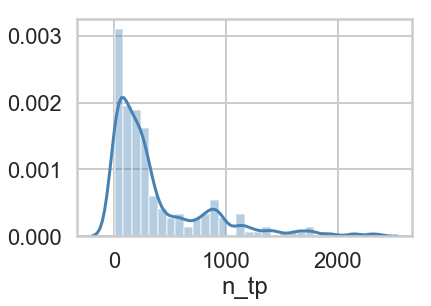

In [64]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [65]:
net_data.subj.nunique()

189

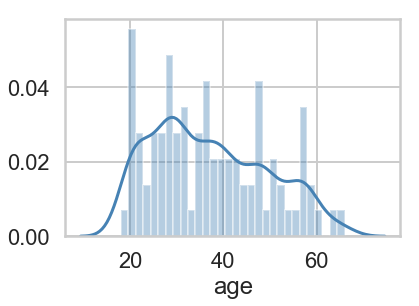

In [12]:
net_data['age'].replace(to_replace=0, value=None, inplace=True)
sns.distplot(net_data['age'].dropna(), bins=30, color='steelblue')
mean_age = net_data['age'].mean()

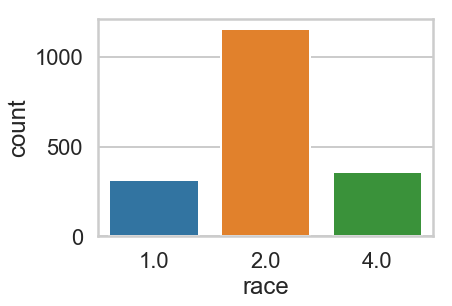

In [13]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

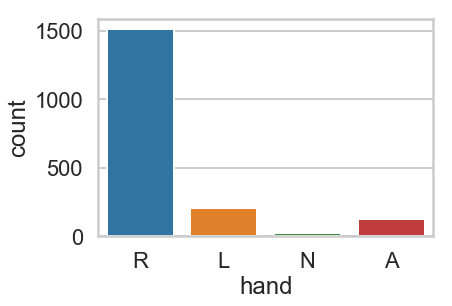

In [14]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

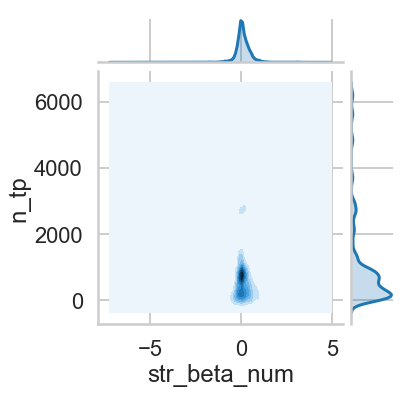

In [15]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

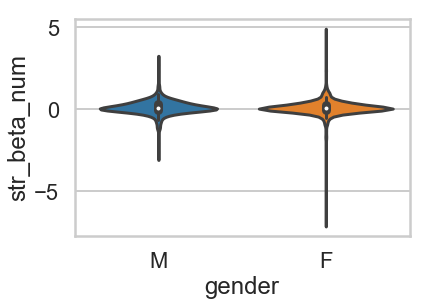

In [16]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [17]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [22]:
net_data.dropna().subj.nunique()
#net_data[net_data.band_measure == 'theta_plv'].dropna().subj.count()

47

In [19]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46535 entries, 1 to 211459
Data columns (total 27 columns):
elec                      46535 non-null object
band_measure              46535 non-null object
n_tp                      46535 non-null int64
elec_spike                46535 non-null float64
elec_in_soz               46535 non-null int64
str_soz_beta_bin          46535 non-null float64
str_not_soz_beta_bin      46535 non-null float64
str_spike_beta_bin        46535 non-null float64
str_not_spike_beta_bin    46535 non-null float64
str_beta_bin              46535 non-null float64
str_soz_beta_num          46535 non-null float64
str_not_soz_beta_num      46535 non-null float64
str_spike_beta_num        46535 non-null float64
str_beta_num              46535 non-null float64
str_not_spike_beta_num    46535 non-null float64
fc_measure                46535 non-null object
band                      46535 non-null object
region                    46535 non-null object
x                

In [20]:
# save
net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength.

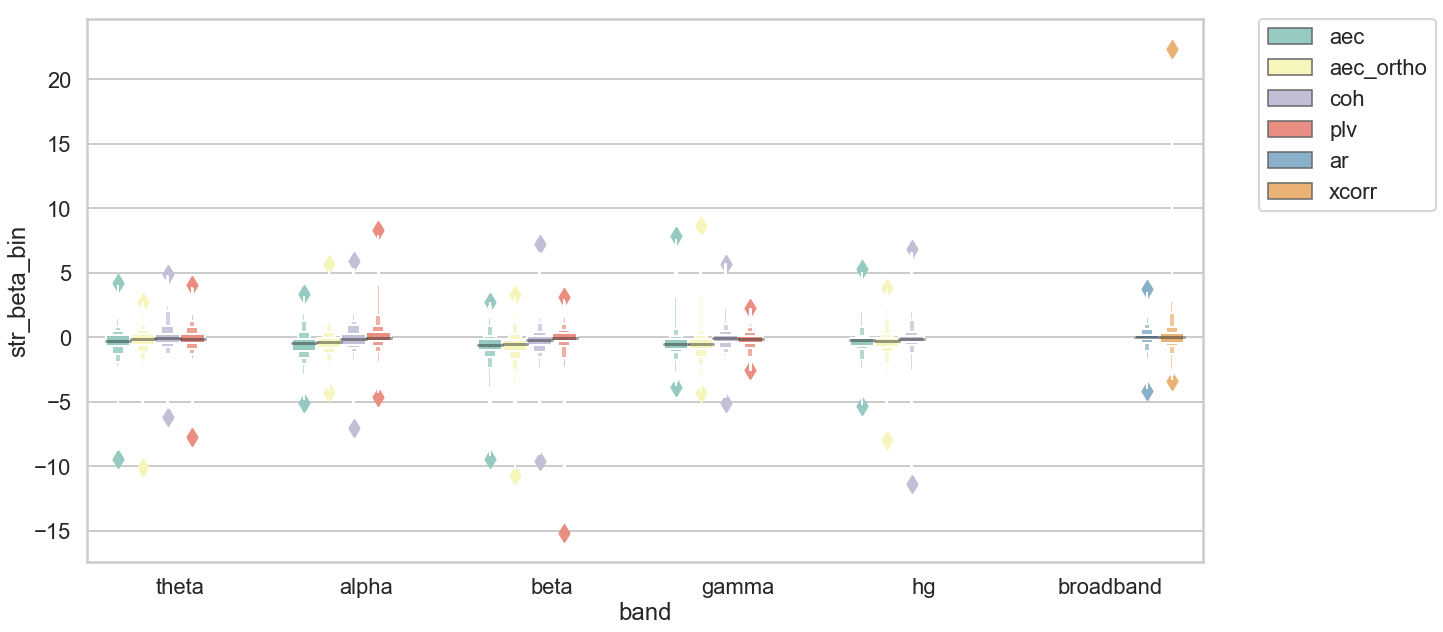

In [24]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set3')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_bin', hue='fc_measure', 
            order=['theta','alpha','beta','gamma','hg','broadband'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-5,5)
#plt.savefig("../img/net_bin_str.eps")


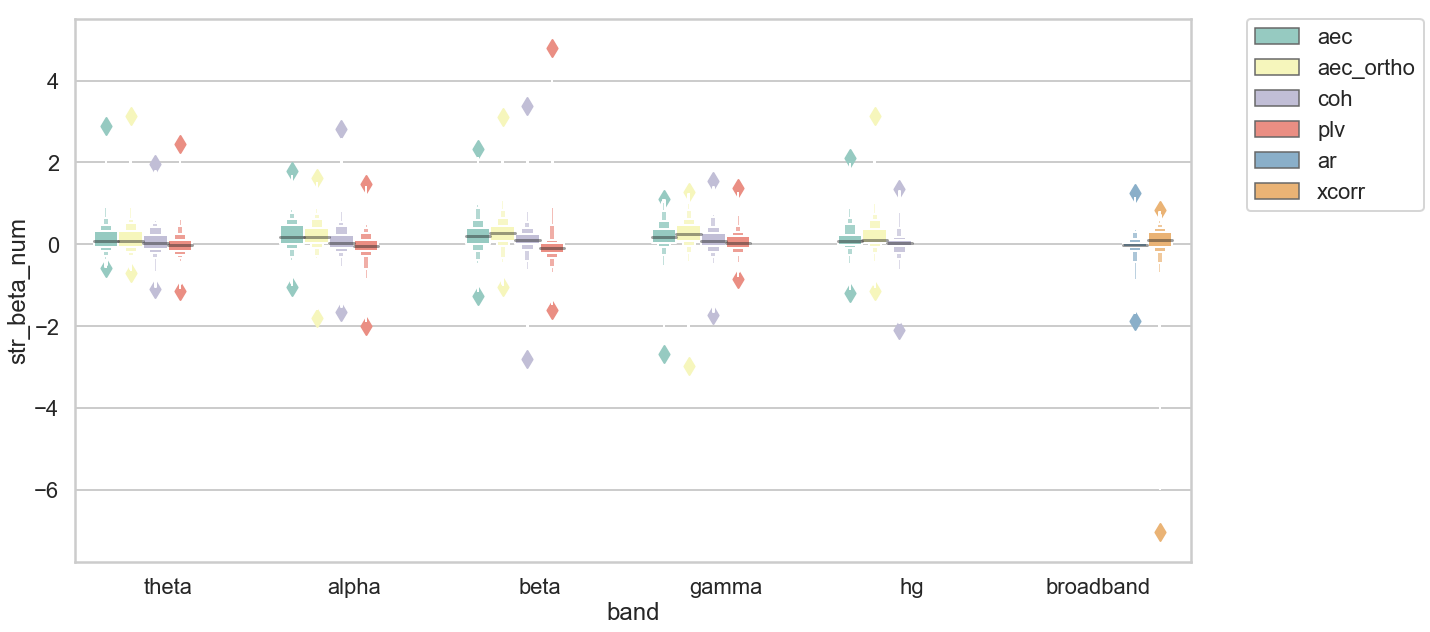

In [25]:
# color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_num', hue='fc_measure',
           order=['theta','alpha','beta','gamma','hg','broadband'], palette="Set3")
#sns.stripplot( data=net_data, x="band", y='str_beta_num',hue='fc_measure',color='black',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-4,4)
#plt.savefig("../img/net_num_str.eps")

Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


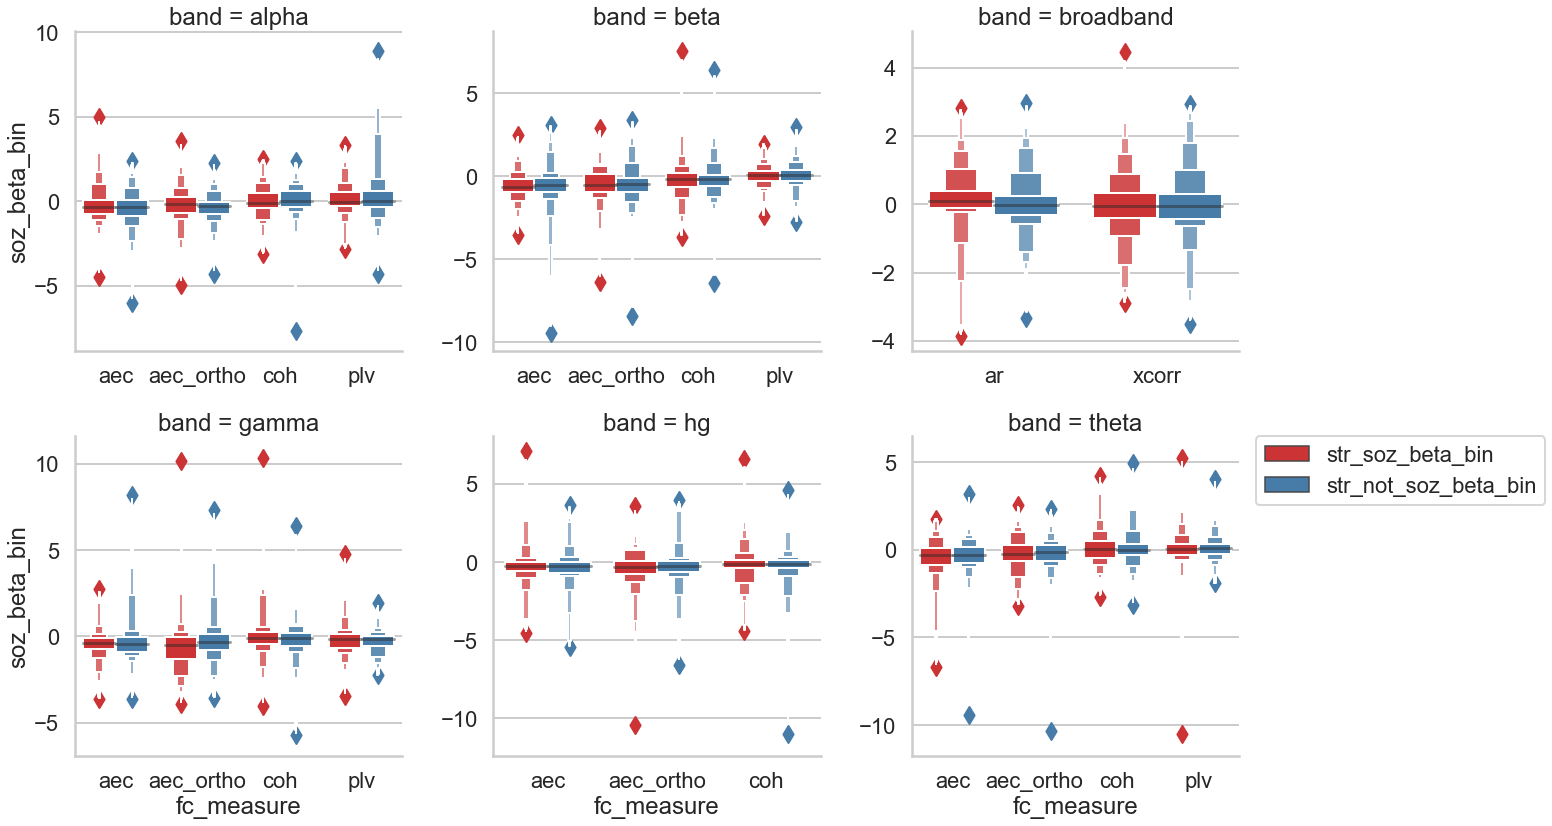

In [26]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  

#color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette("Set1")
    
g = sns.FacetGrid(data=soz_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_bin', 'SOZ', palette = "Set1", hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


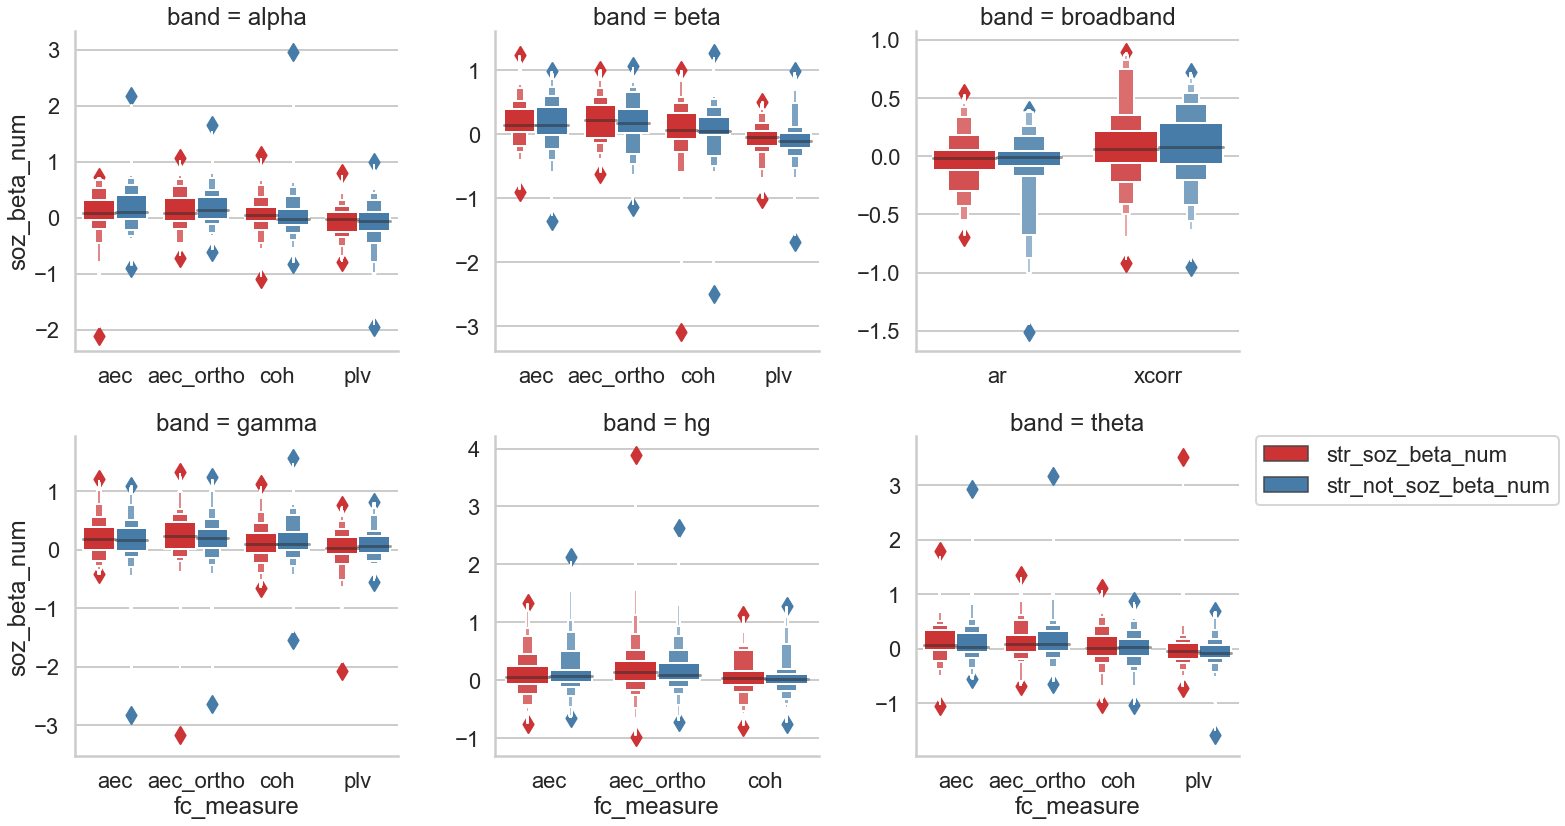

In [27]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=soz_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_num', 'SOZ', palette = "Set1", hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

In [28]:
# save
# reformat before merge
soz_net_data_bin['SOZ'].replace('str_soz_beta_bin','within', inplace=True)
soz_net_data_bin['SOZ'].replace('str_not_soz_beta_bin','outside', inplace=True)
soz_net_data_num['SOZ'].replace('str_soz_beta_num','within', inplace=True)
soz_net_data_num['SOZ'].replace('str_not_soz_beta_num','outside', inplace=True)
soz_net_data = pd.merge(soz_net_data_bin, soz_net_data_num, on=['band', 'fc_measure', 'subj', 'SOZ', 'hand','race','gender','age'])
soz_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_soz_data_clean.csv')

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


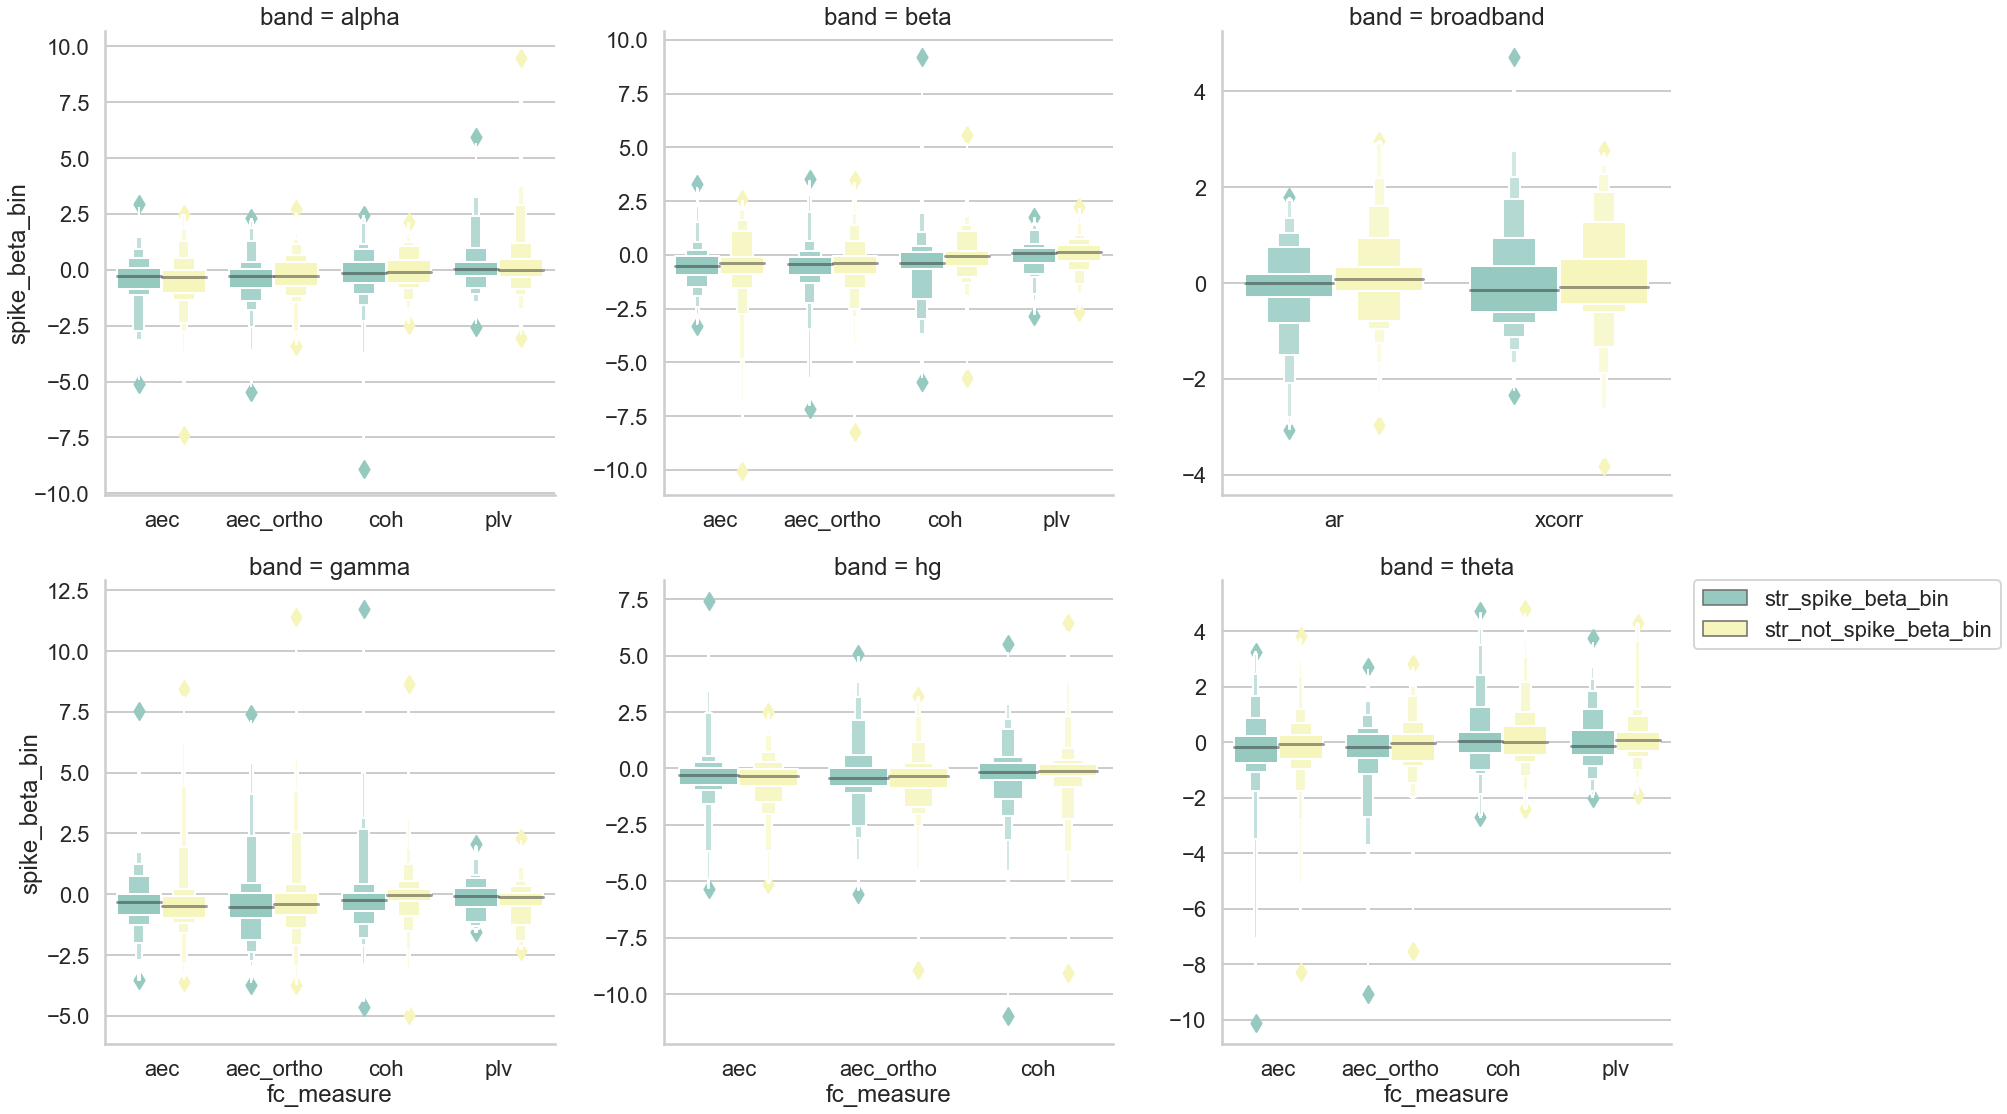

In [29]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_bin', 'spike', palette = "Set3", hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
#    plt.setp(ax.lines, color=".9")
    
g.savefig("../img/net_spike_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


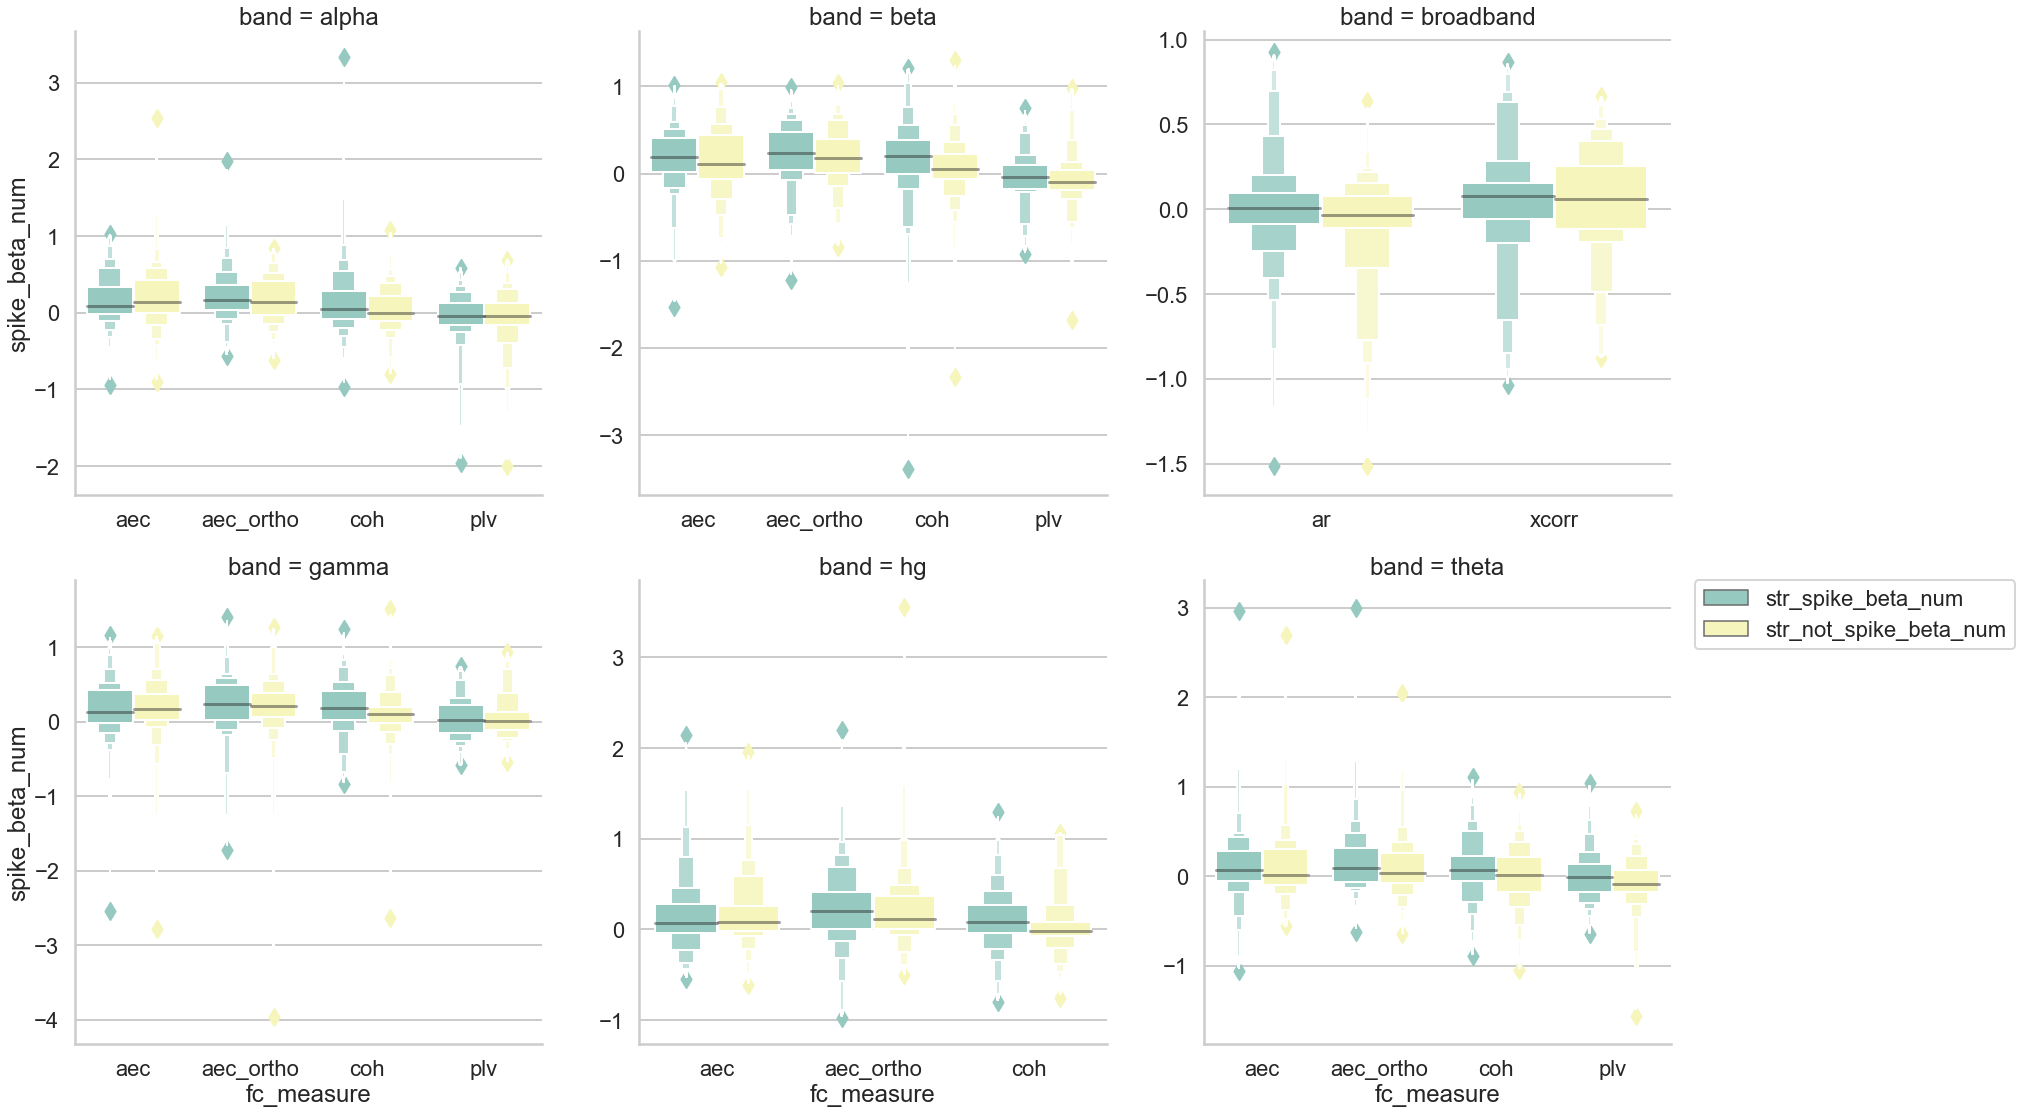

In [30]:
# reshape data
spike_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=spike_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_num', 'spike', palette = "Set3", hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_num.eps")

In [59]:
# save
# reformat before merge
spike_net_data_bin['spike'].replace('str_spike_beta_bin','within', inplace=True)
spike_net_data_bin['spike'].replace('str_not_spike_beta_bin','outside', inplace=True)
spike_net_data_num['spike'].replace('str_spike_beta_num','within', inplace=True)
spike_net_data_num['spike'].replace('str_not_spike_beta_num','outside', inplace=True)
spike_net_data = pd.merge(spike_net_data_bin, spike_net_data_num, on=['band', 'fc_measure', 'subj', 'spike', 'hand','race','gender','age'])
spike_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_spike_data_clean.csv')

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


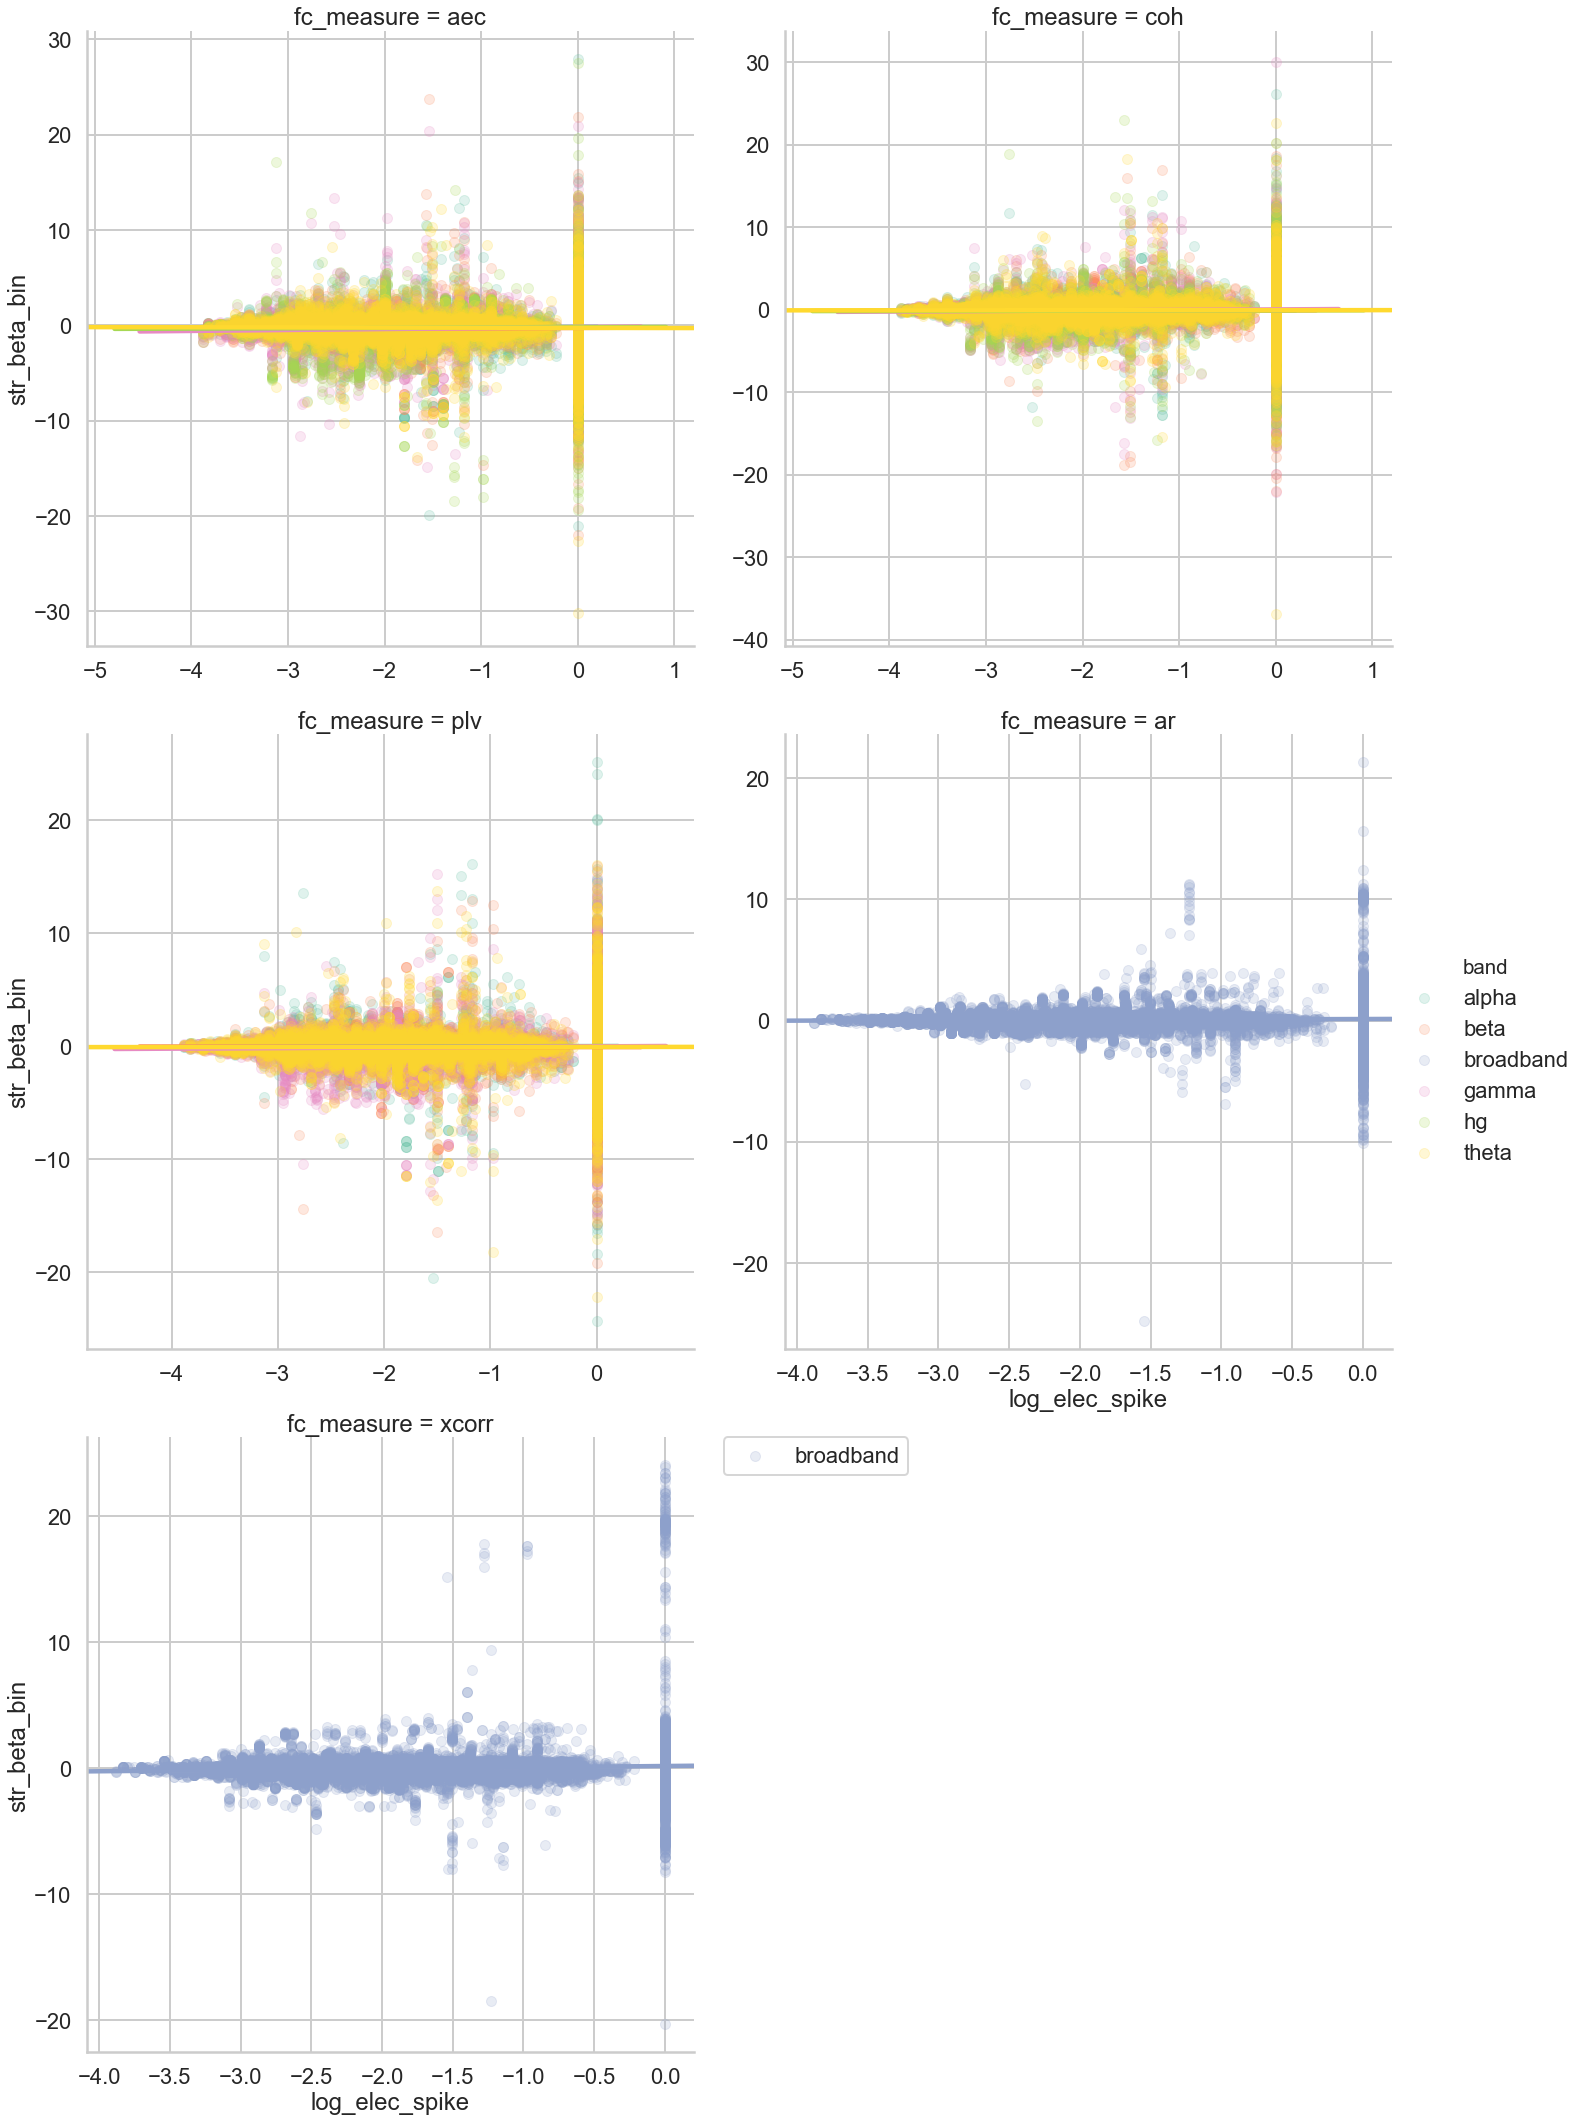

In [99]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


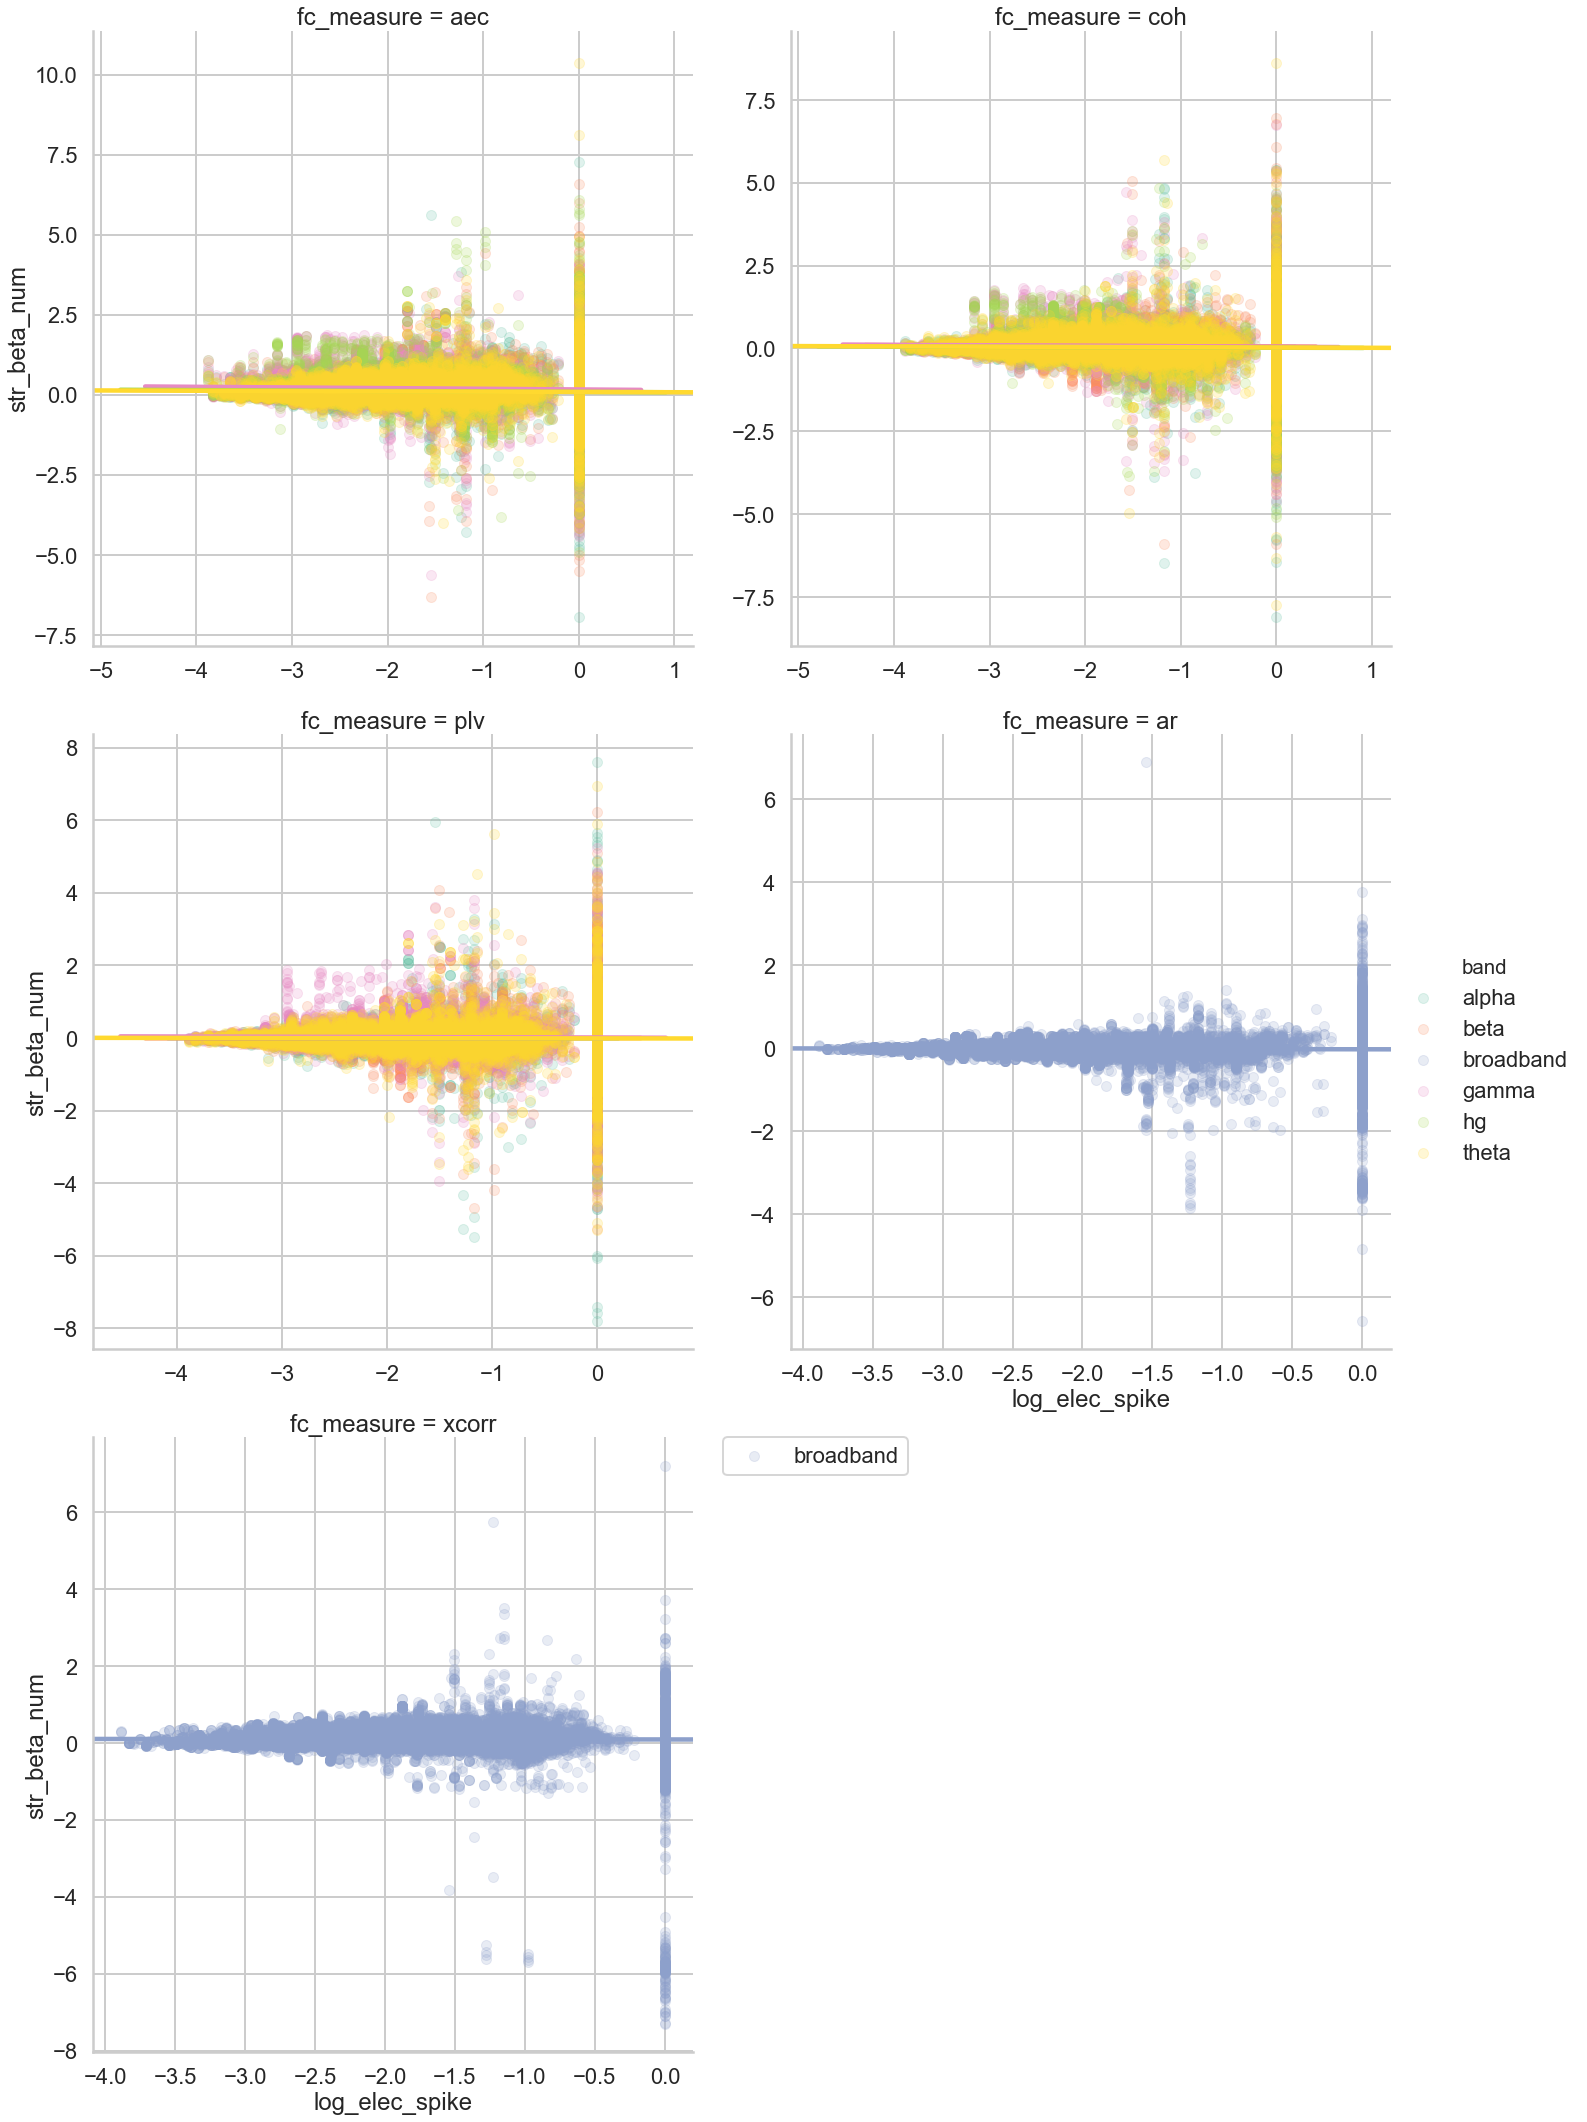

In [227]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


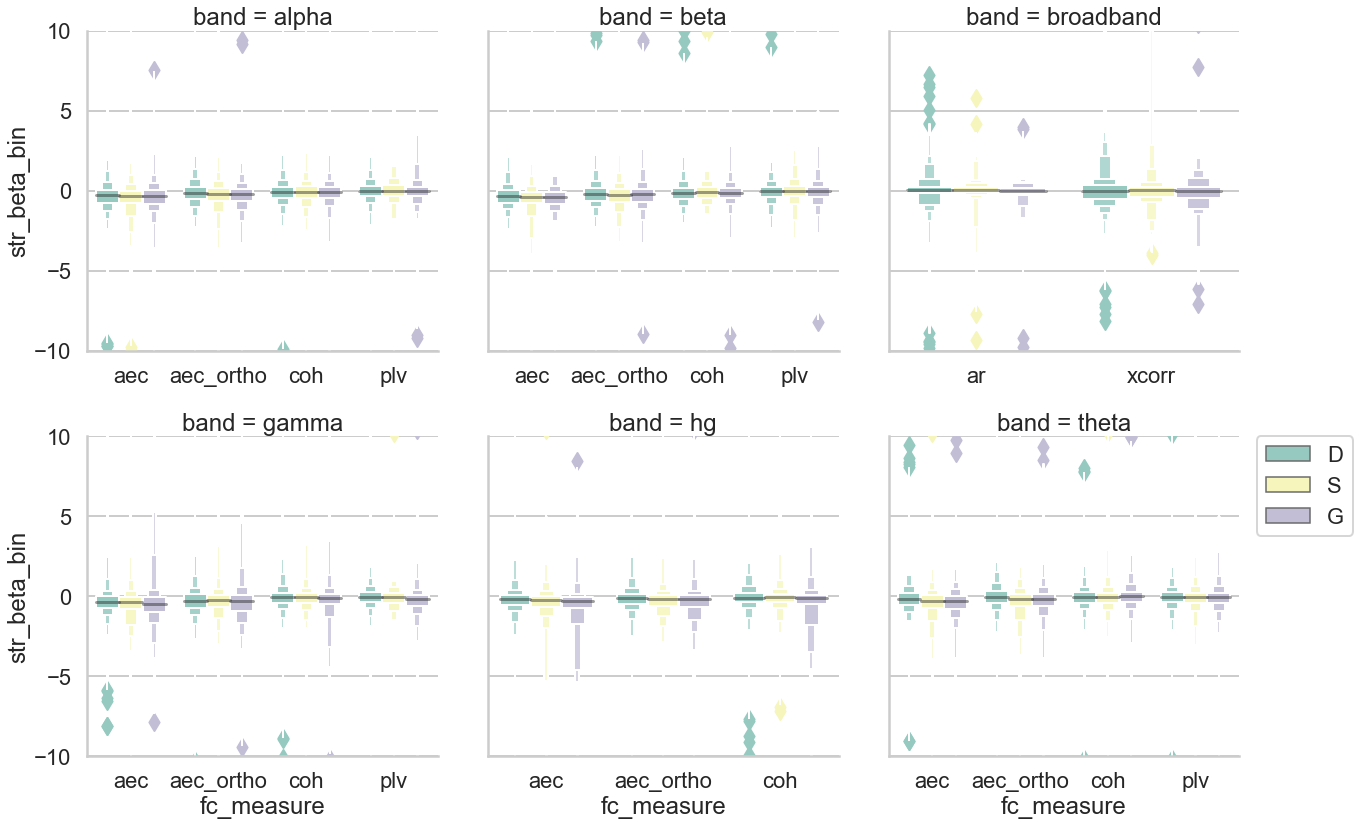

In [31]:
# grand teton natl park color pallette
#colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-10,10)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


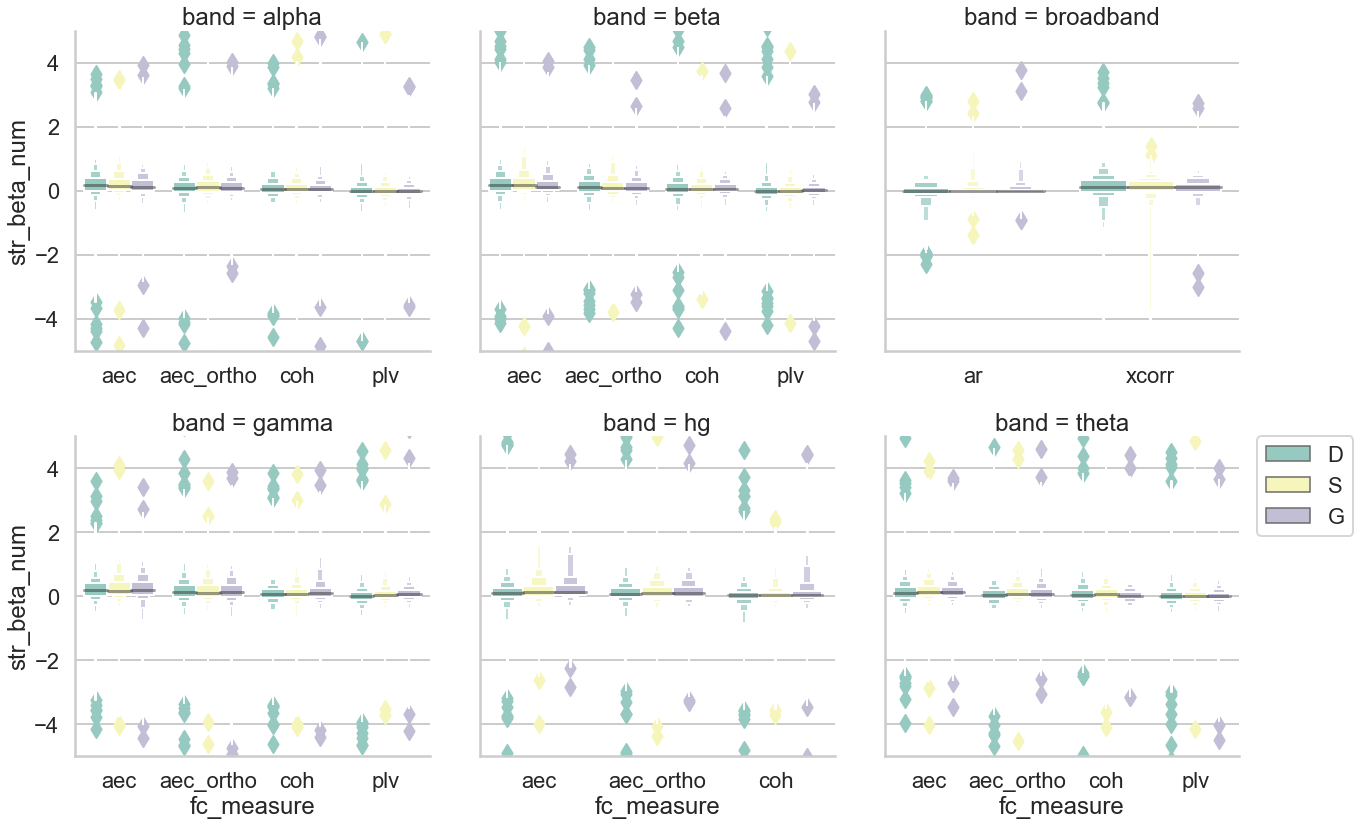

In [32]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-5,5)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


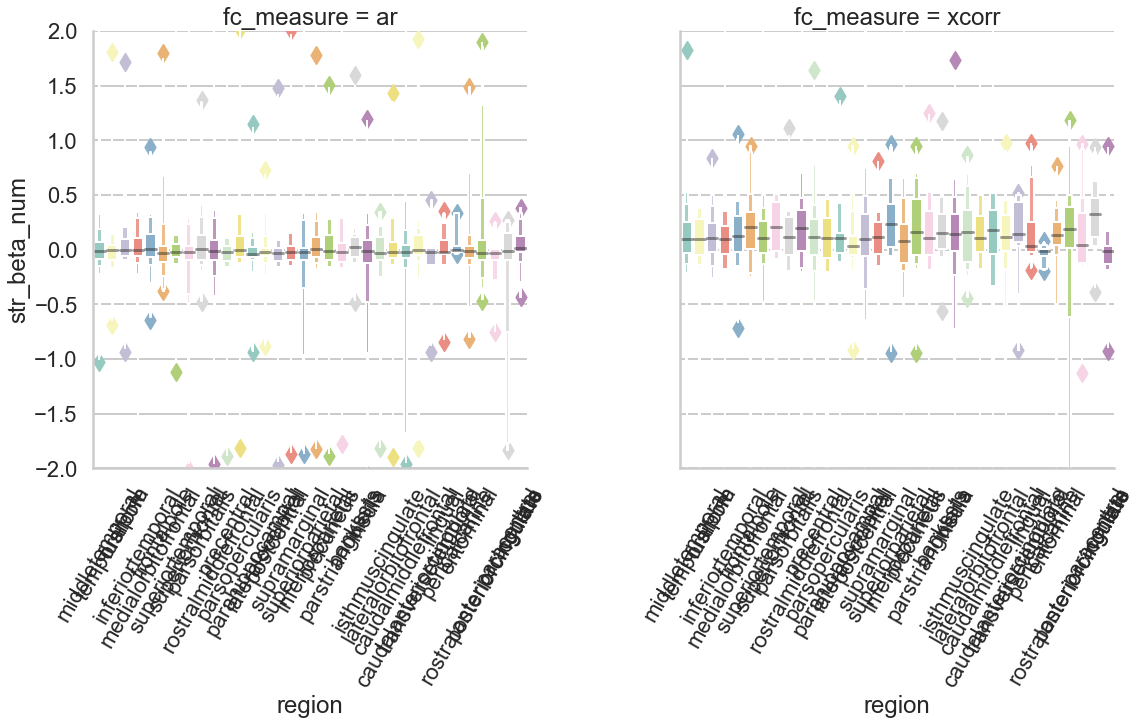

In [33]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data[node_data['band'] == 'broadband'], col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, size=8)
g.map(sns.boxenplot, 'region', 'str_beta_num', palette = 'Set3')

for ax in g.axes:
    ax.set_ylim(-2,2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

### Categorize SOZ

In [34]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [35]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subj locus
0  R1175N   amb
1  R1170J   tle
2  R1166D   amb
3  R1161E   amb
4  R1124J   tle

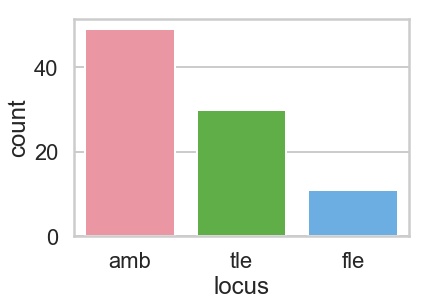

In [36]:
sns.countplot(data=epilepsy_type, x='locus')

In [37]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.head()

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
0        alpha_aec   430     -0.381462      0.475069         -0.479936   
1  alpha_aec_ortho   430     -0.232843      0.414085         -0.200678   
2        alpha_coh   430     -0.377510      0.441747         -0.368589   
3        alpha_plv   430     -0.456733      0.413028         -0.517453   
4         beta_aec   430     -0.591918      0.545076         -0.733584   

   str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
0          0.474653              0.475251            0.471236   
1          0.412866              0.408954            0.308307   
2          0.476458              0.434604            0.312499   
3          0.434959              0.400411            0.288097   
4          0.613832              0.545029            0.516449   

   str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
0             -0.377808           -0.375538               -0.387141   
1             -0.232903           -0.027842               -0.272014   
2             -0.370379           -0.173272               -0.410711   
3             -0.440434           -0.282706               -0.482510   
4             -0.589184           -0.499192               -0.610455   

  fc_measure  str_not_spike_beta_num   band    subj hand   age gender  race  \
0        aec                0.480301  alpha  R1175N    R  34.0      M   1.0   
1  aec_ortho                0.436273  alpha  R1175N    R  34.0      M   1.0   
2        coh                0.459005  alpha  R1175N    R  34.0      M   1.0   
3        plv                0.429426  alpha  R1175N    R  34.0      M   1.0   
4        aec                0.553404   beta  R1175N    R  34.0      M   1.0   

  locus  
0   amb  
1   amb  
2   amb  
3   amb  
4   amb

In [38]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202167 entries, 0 to 202166
Data columns (total 28 columns):
elec                      202167 non-null object
band_measure              202167 non-null object
n_tp                      202167 non-null int64
elec_spike                202167 non-null float64
elec_in_soz               202167 non-null int64
str_soz_beta_bin          126420 non-null float64
str_not_soz_beta_bin      116761 non-null float64
str_spike_beta_bin        112329 non-null float64
str_not_spike_beta_bin    100255 non-null float64
str_beta_bin              194628 non-null float64
str_soz_beta_num          126420 non-null float64
str_not_soz_beta_num      116761 non-null float64
str_spike_beta_num        112329 non-null float64
str_beta_num              194628 non-null float64
str_not_spike_beta_num    100255 non-null float64
fc_measure                202167 non-null object
band                      202167 non-null object
region                    184065 non-null objec

## Net plots with category by locus

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


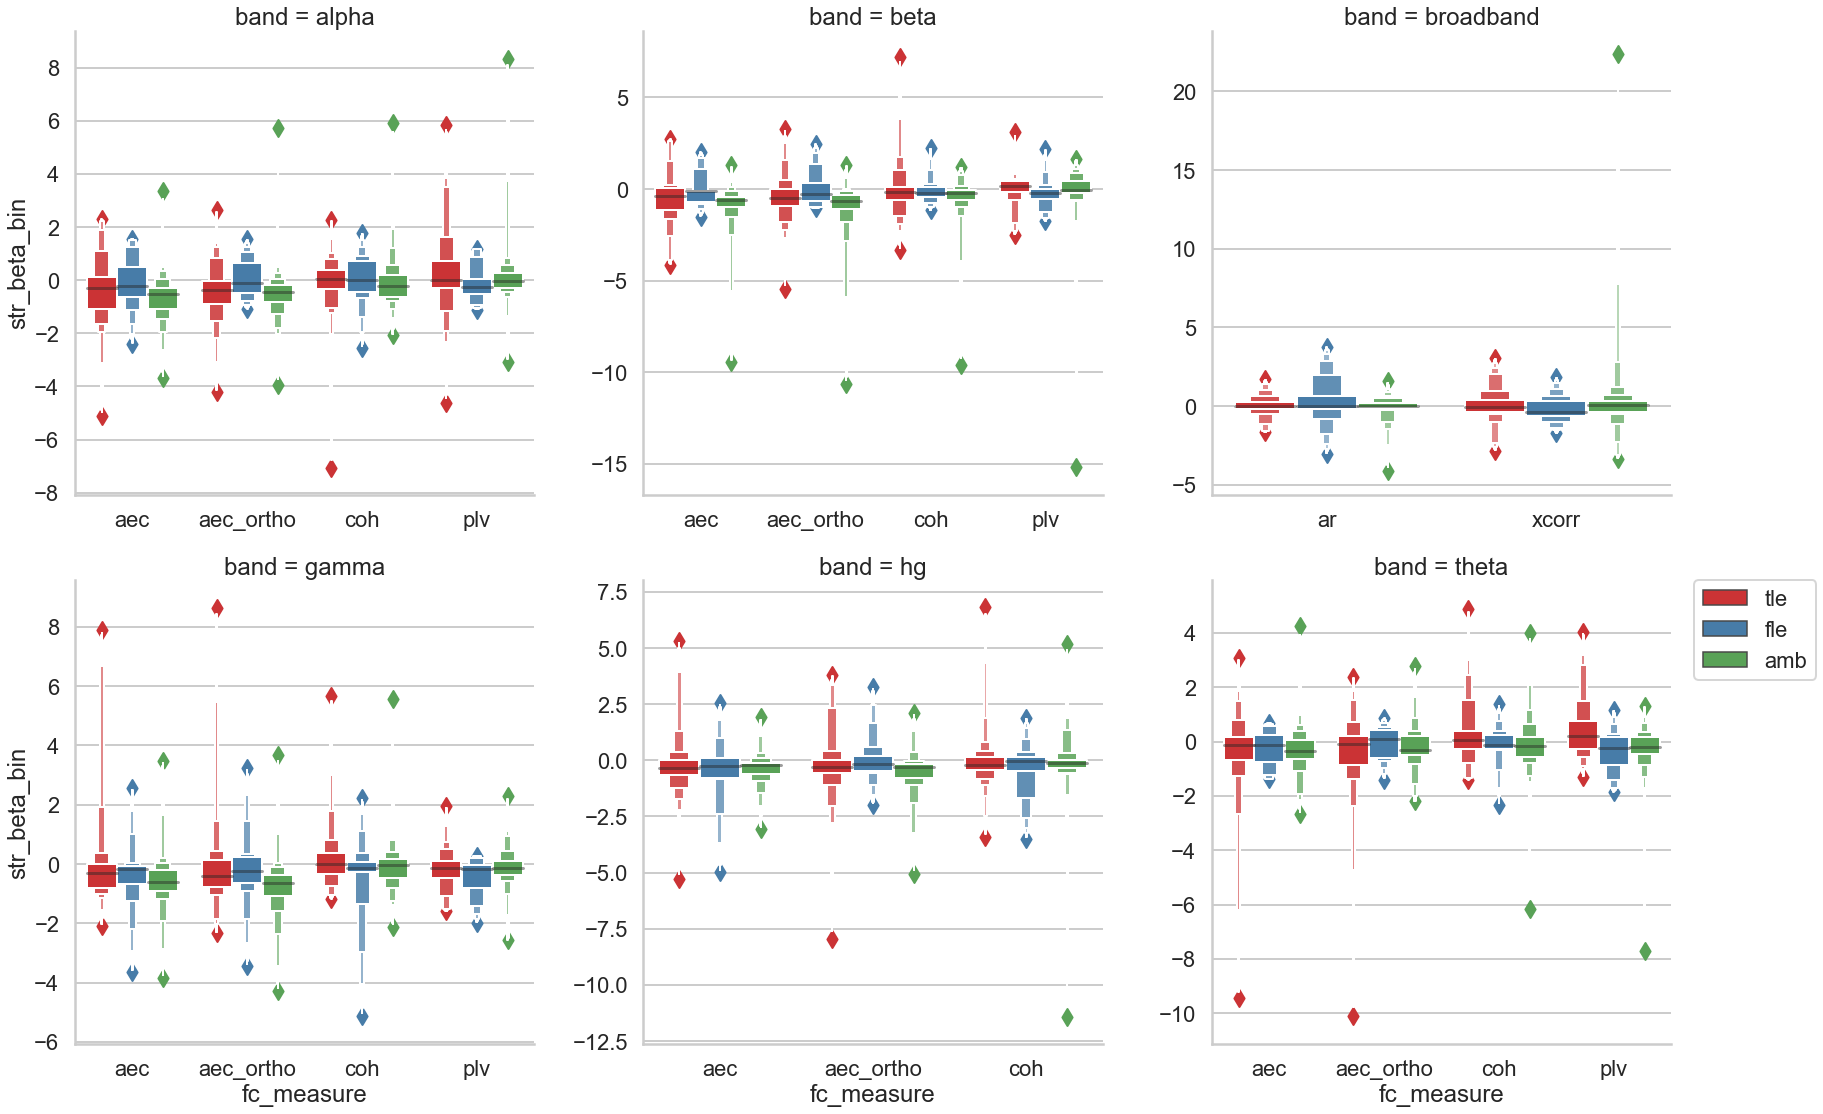

In [39]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
#g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


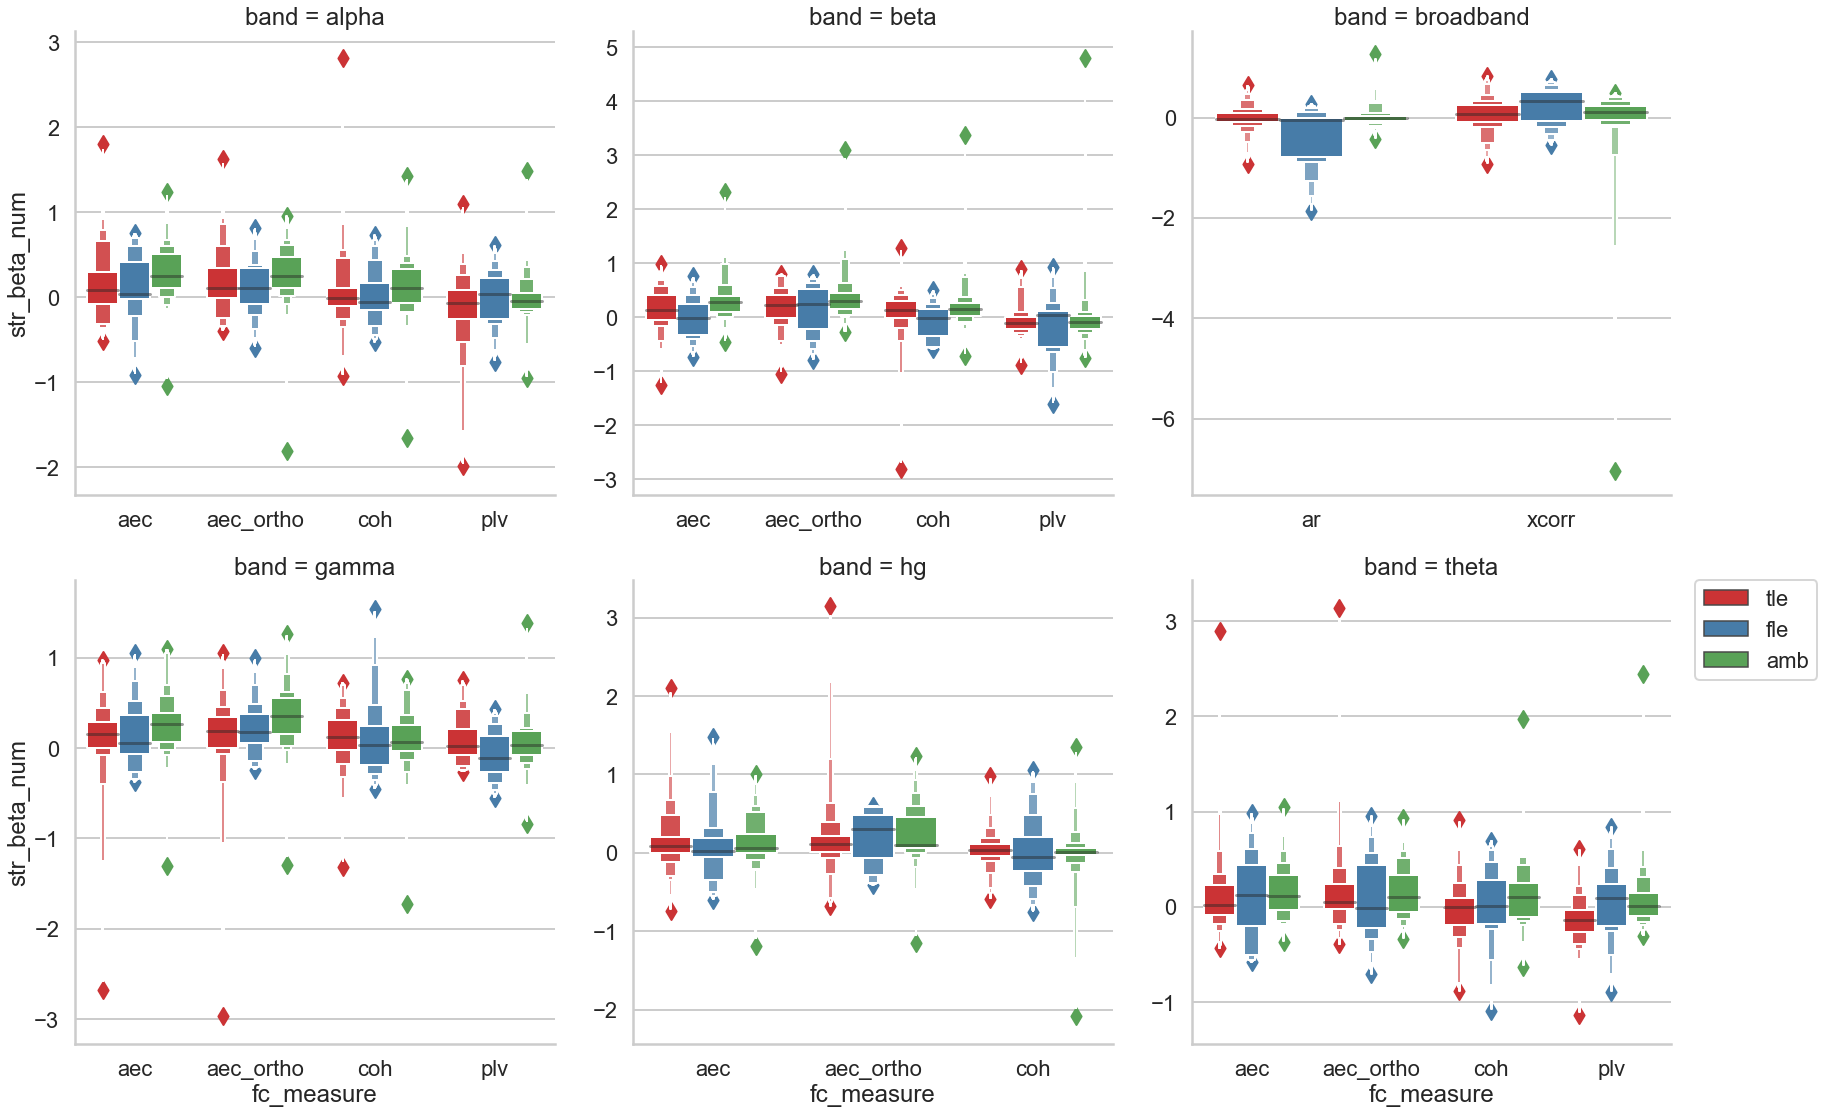

In [40]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

## Behavior

In [41]:
task_data = pd.read_csv(f'{RAM_dir}group_analysis/task_performance.csv', index_col=0)
task_data.reset_index(inplace=True)
task_data.head(10)

subj        YC  TH       PAL  catFR        FR
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573
1  R1002P       NaN NaN  0.492335    NaN  0.945857
2  R1003P       NaN NaN  0.083711    NaN  0.602817
3  R1004D       NaN NaN       NaN  0.625       NaN
4  R1006P  0.401778 NaN       NaN    NaN  0.779412
5  R1008J  0.530724 NaN       NaN    NaN       NaN
6  R1009W  0.183700 NaN       NaN    NaN       NaN
7  R1010J  0.358207 NaN       NaN    NaN  0.825373
8  R1013E  0.182021 NaN       NaN    NaN       NaN
9  R1014D  0.354468 NaN       NaN    NaN       NaN

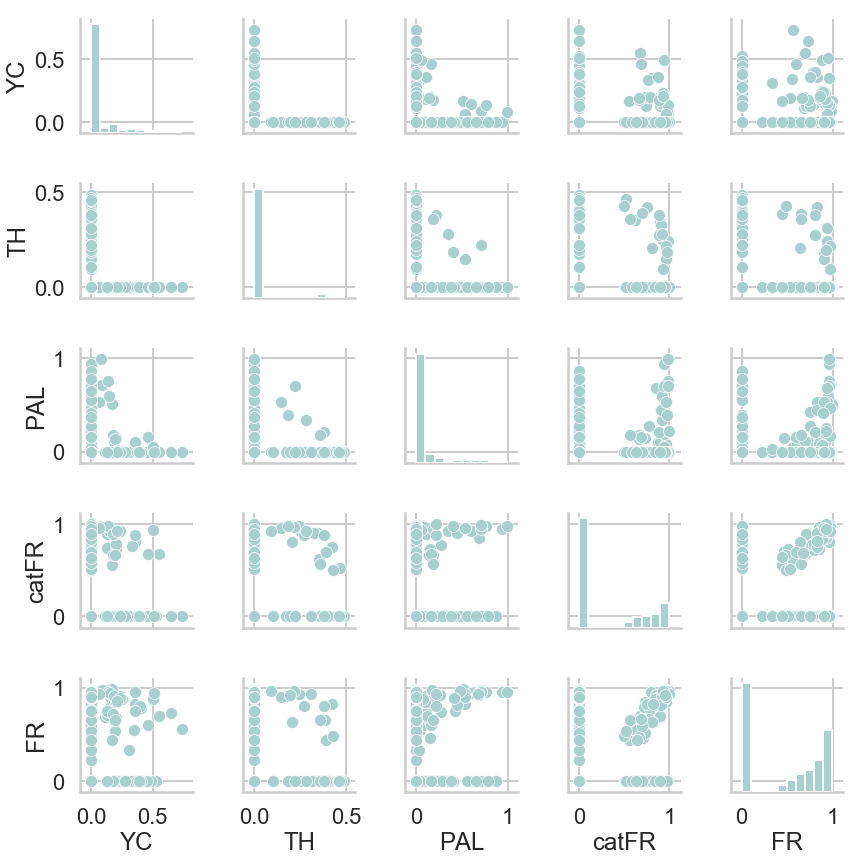

In [42]:
sns.pairplot(data=task_data.fillna(0), vars=['YC','TH','PAL','catFR','FR'])

In [43]:
# add averages over recal and nav tasks
task_data = task_data.assign(recall = task_data[['catFR','FR','PAL']].mean(axis=1, skipna=True))
task_data = task_data.assign(nav = task_data[['TH','YC']].mean(axis=1, skipna=True))
task_data = task_data.assign(avg = task_data[['nav','recall']].mean(axis=1, skipna=True))
task_data.head()

subj        YC  TH       PAL  catFR        FR    recall       nav  \
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573  0.293972  0.345526   
1  R1002P       NaN NaN  0.492335    NaN  0.945857  0.719096       NaN   
2  R1003P       NaN NaN  0.083711    NaN  0.602817  0.343264       NaN   
3  R1004D       NaN NaN       NaN  0.625       NaN  0.625000       NaN   
4  R1006P  0.401778 NaN       NaN    NaN  0.779412  0.779412  0.401778   

        avg  
0  0.319749  
1  0.719096  
2  0.343264  
3  0.625000  
4  0.590595

In [44]:
# merge with net_data
subj_idx = [x in net_data.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
net_task_data = pd.merge(net_data, task_data, on=['subj'])
net_task_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 2519
Data columns (total 28 columns):
band_measure              2520 non-null object
n_tp                      2520 non-null int64
str_beta_bin              2457 non-null float64
str_beta_num              2457 non-null float64
str_soz_beta_bin          1617 non-null float64
str_soz_beta_num          1617 non-null float64
str_not_soz_beta_num      1611 non-null float64
str_spike_beta_num        1407 non-null float64
str_not_soz_beta_bin      1611 non-null float64
str_spike_beta_bin        1407 non-null float64
str_not_spike_beta_bin    1401 non-null float64
fc_measure                2520 non-null object
str_not_spike_beta_num    1401 non-null float64
band                      2520 non-null object
subj                      2520 non-null object
hand                      2520 non-null object
age                       2520 non-null float64
gender                    2478 non-null object
race                      2520 non-nu

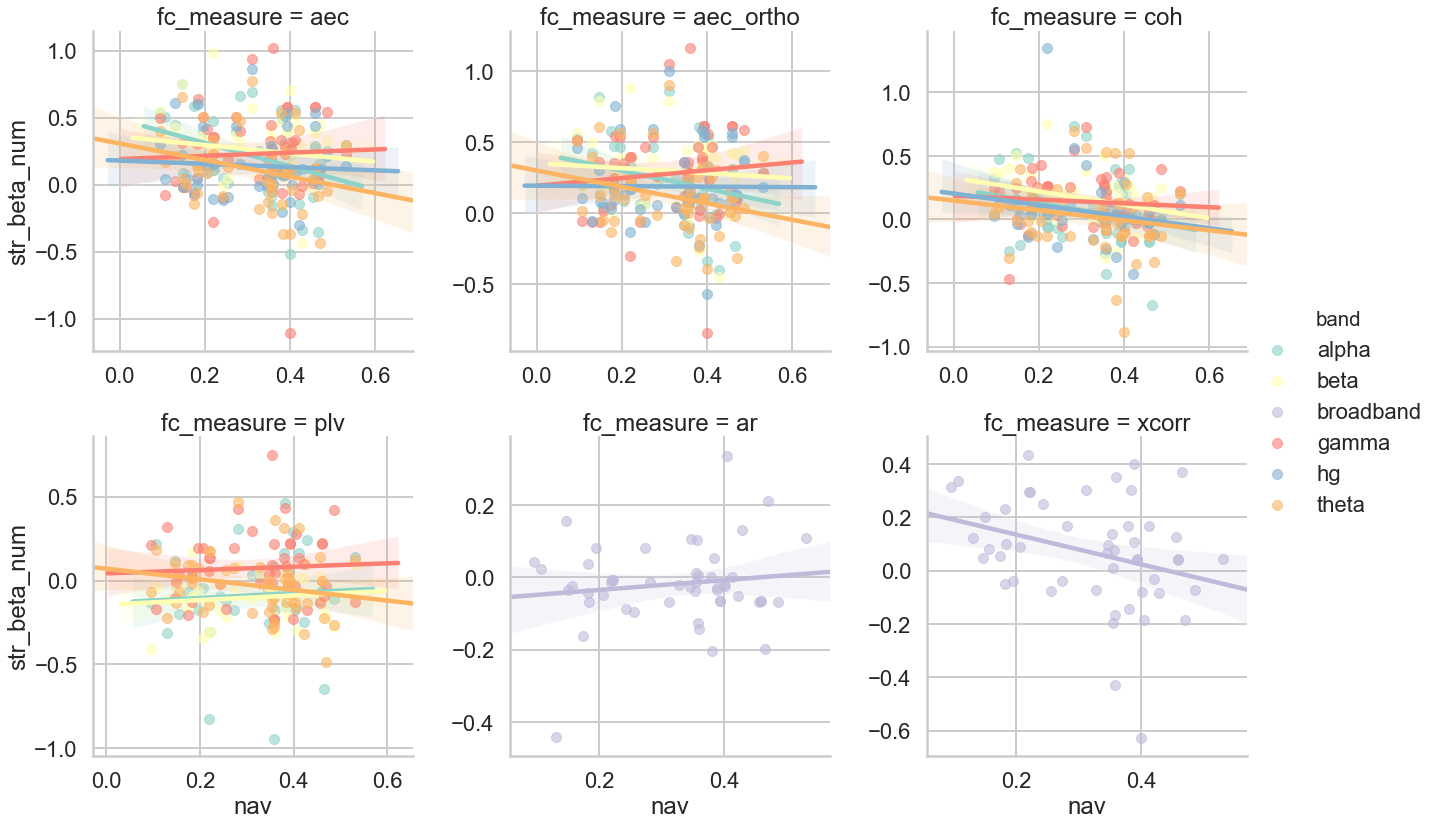

In [46]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

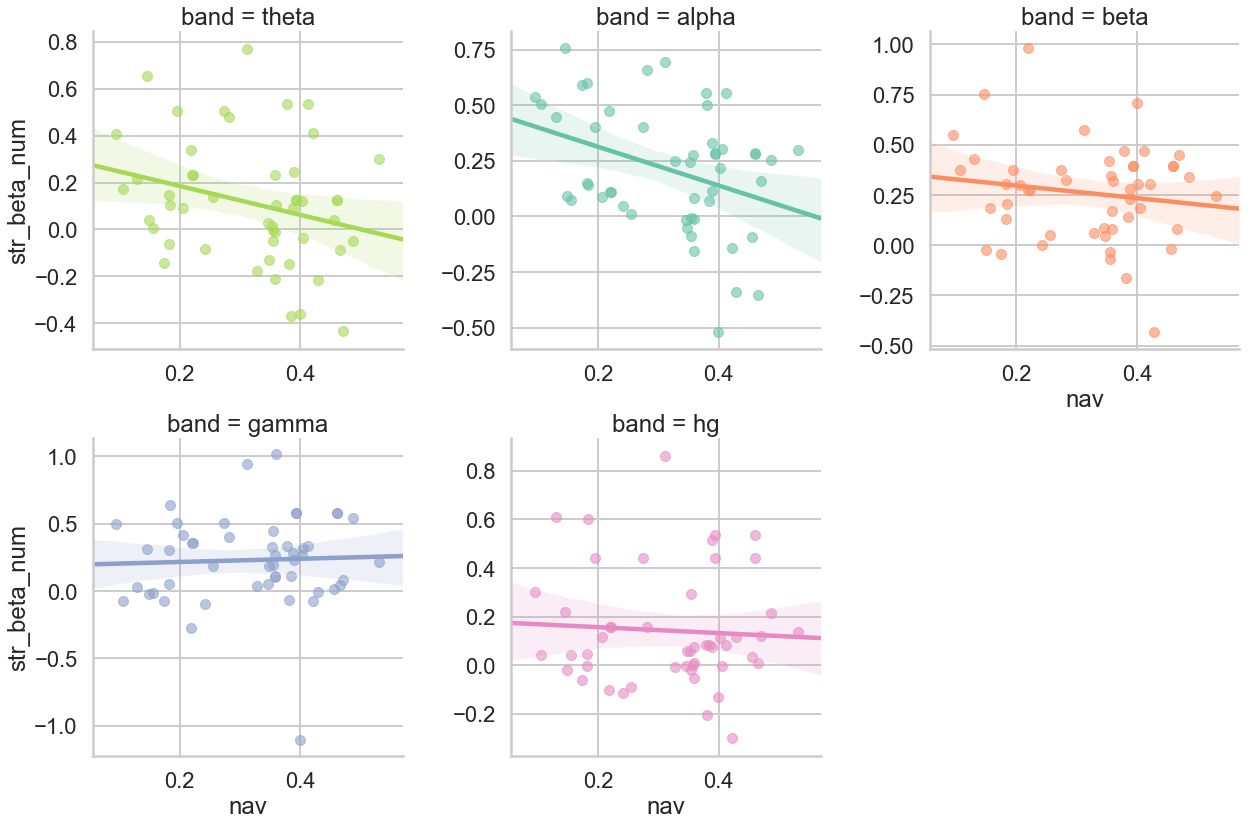

In [47]:
sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6}, col_order=['theta','alpha','beta','gamma','hg'])
plt.savefig("../img/task_perf_band.eps")

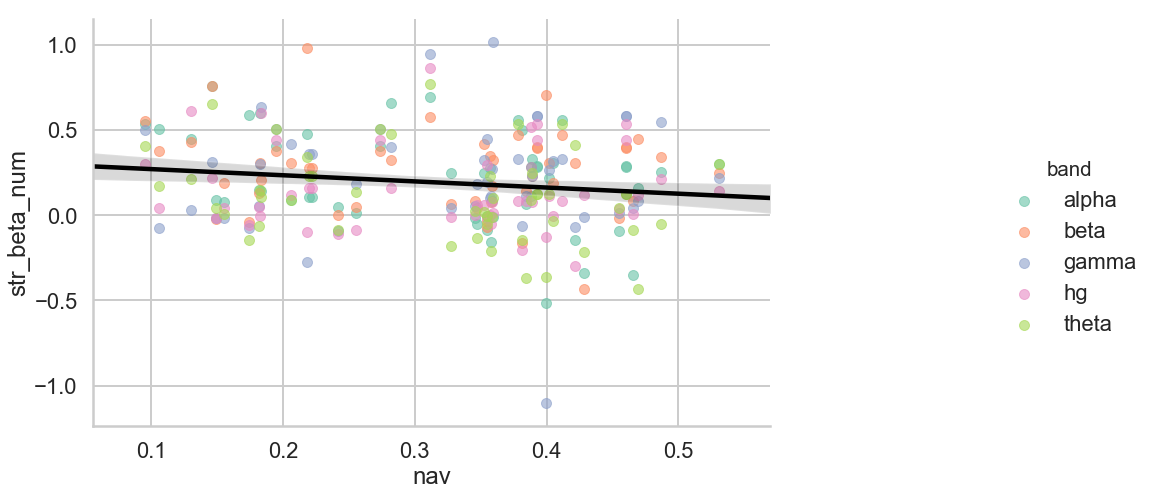

In [48]:
g = sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', fit_reg=False,
           height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})
sns.regplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', scatter=False, ax=g.axes[0,0], color='black')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.savefig("../img/task_perf_band.eps")

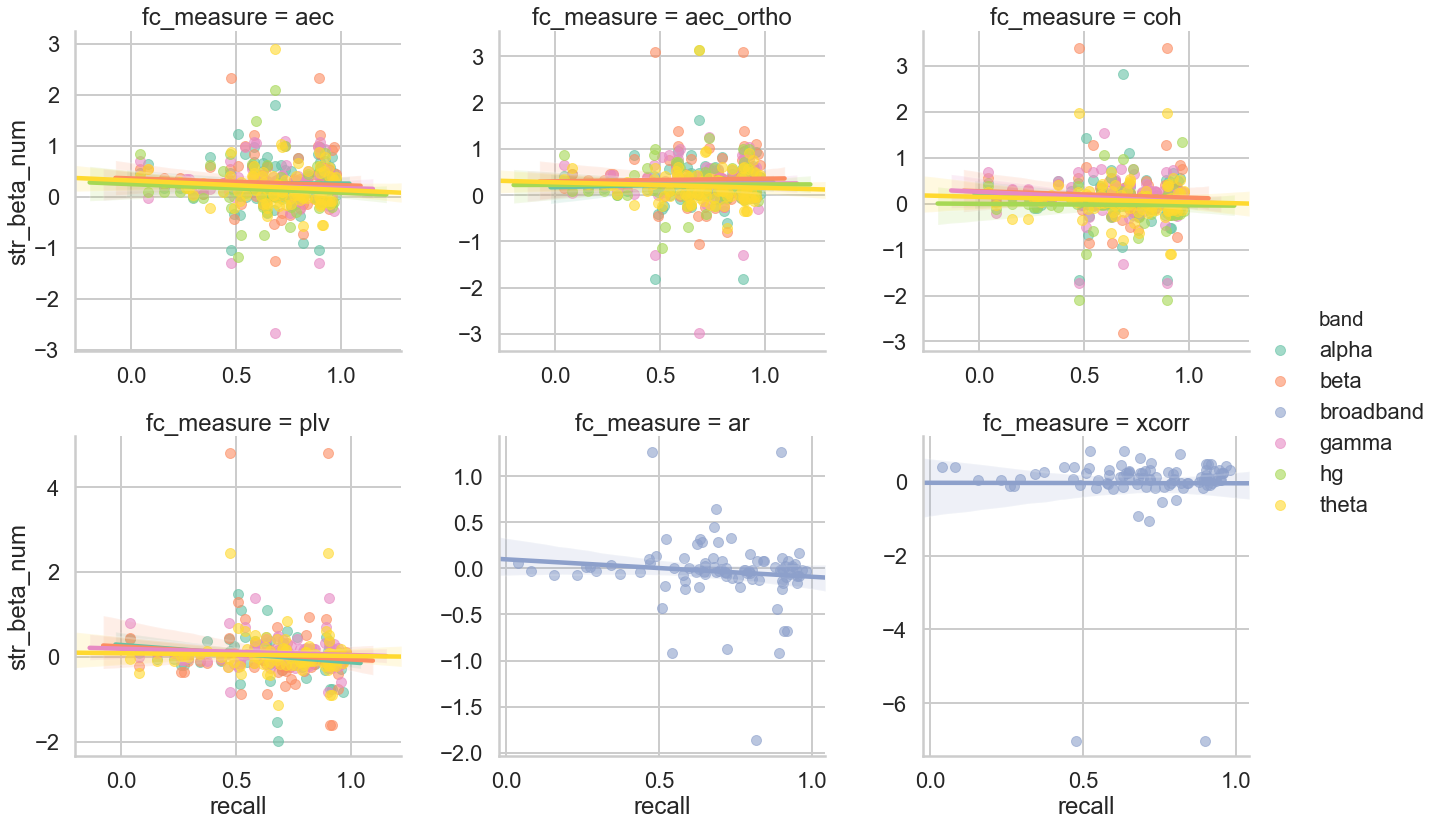

In [49]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

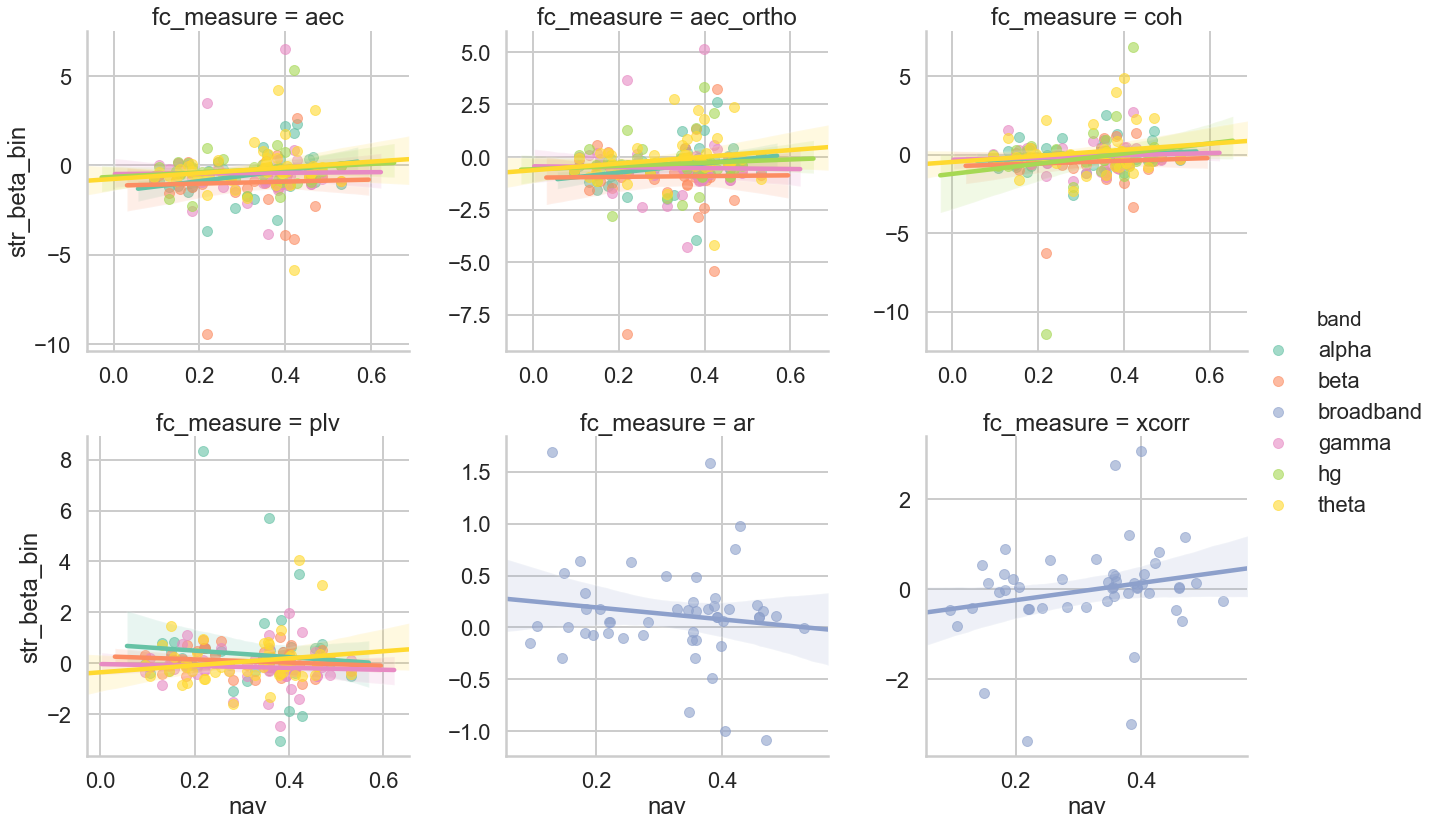

In [50]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

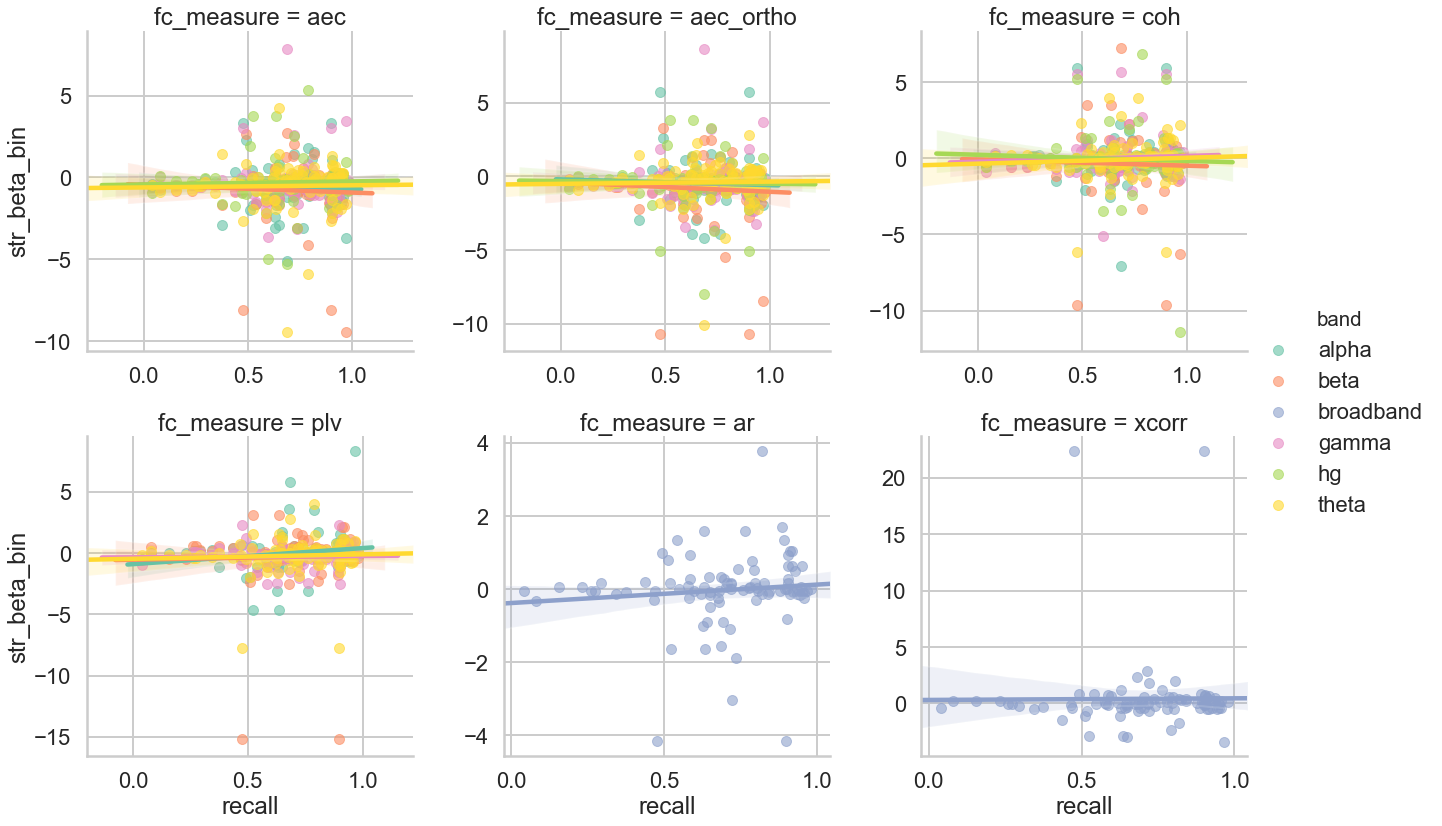

In [52]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

In [53]:
# save
net_task_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_task_data_clean.csv')

Other parameters

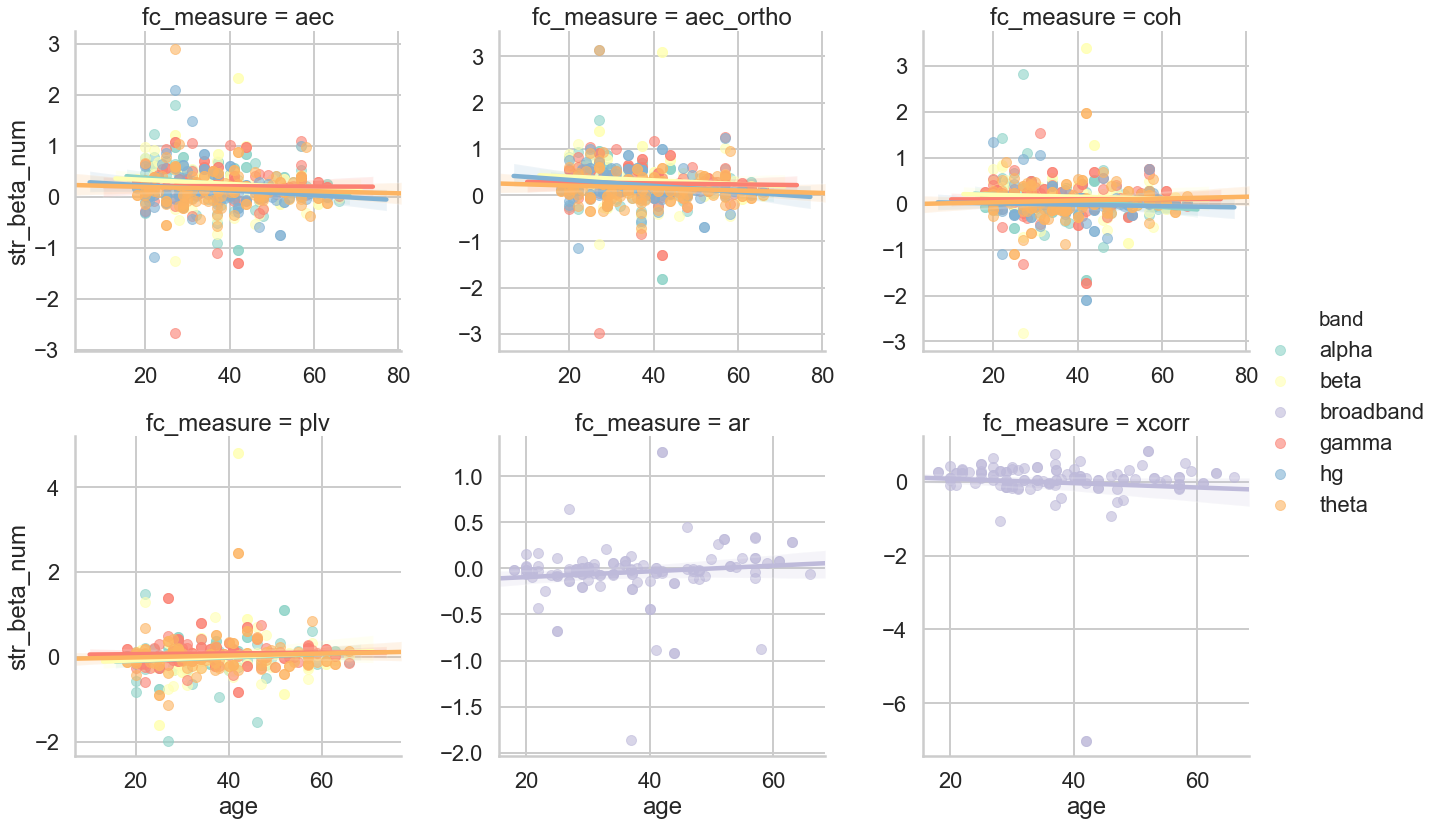

In [54]:
sns.lmplot(data=net_task_data, x='age', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


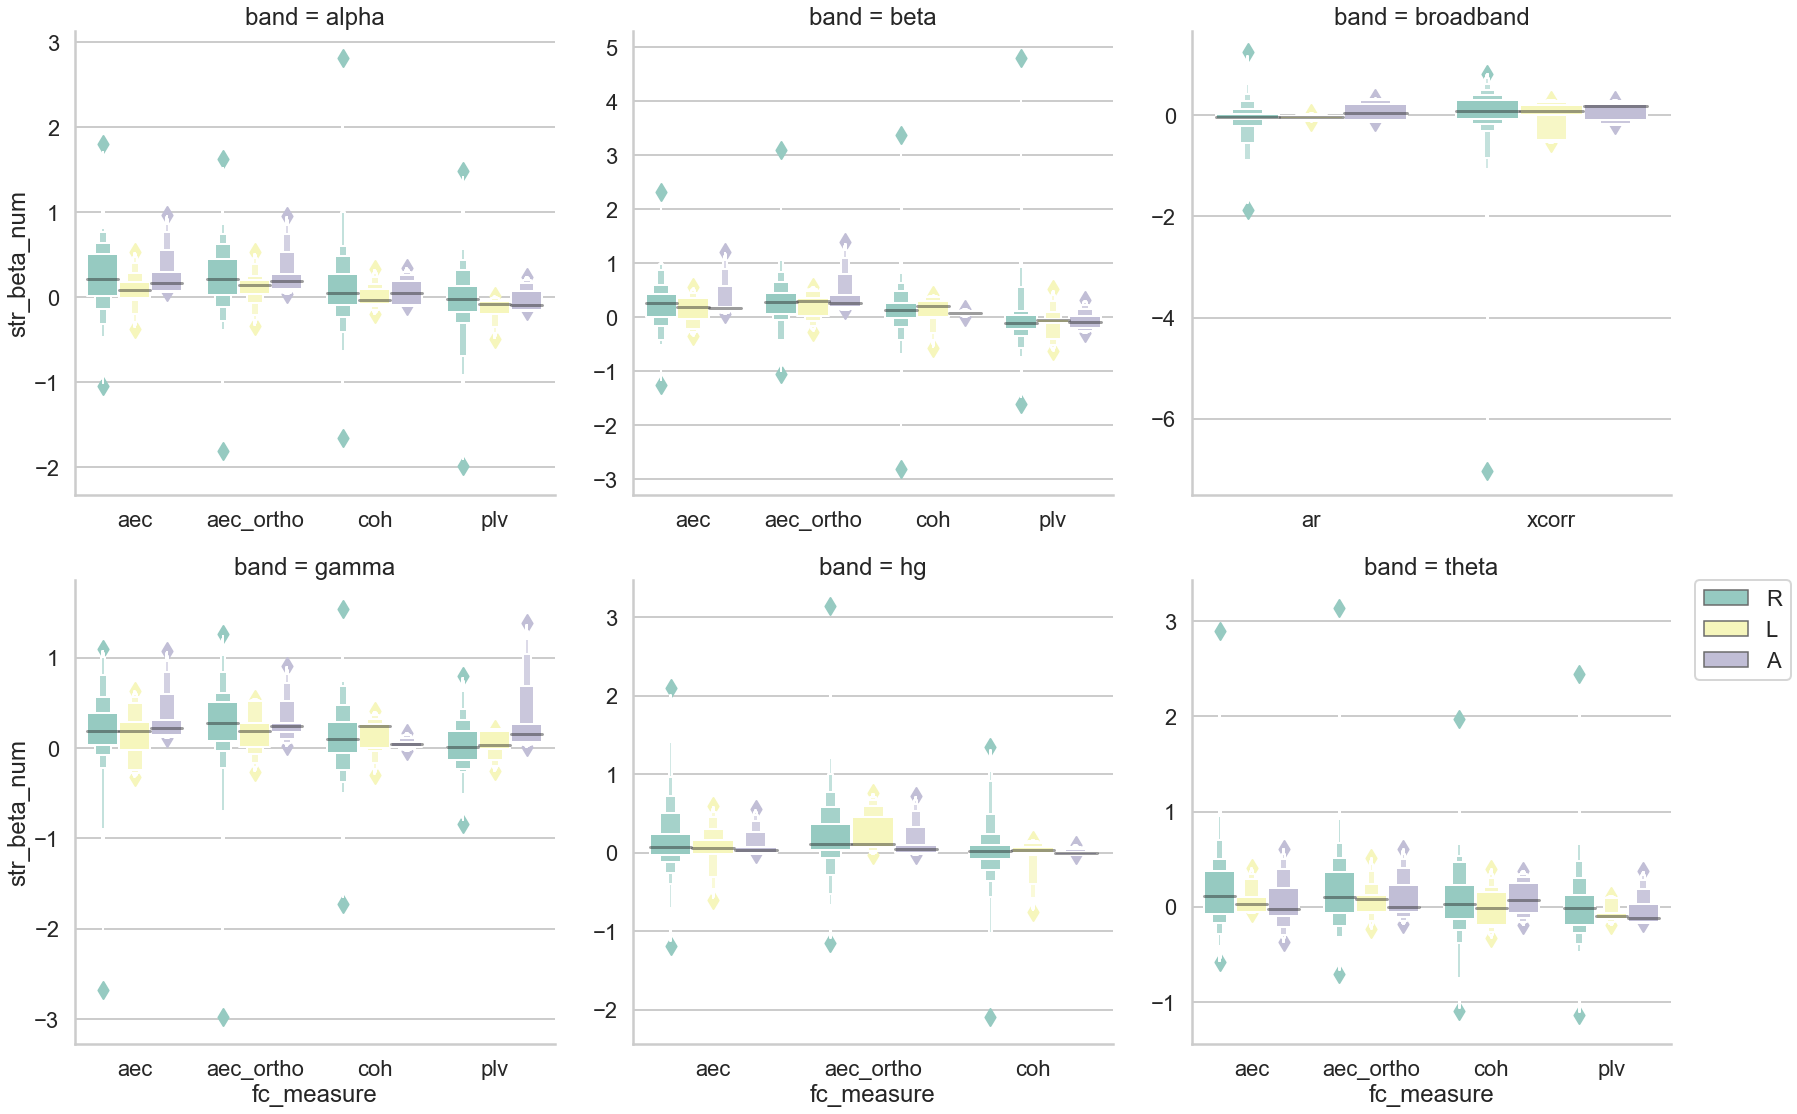

In [55]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'hand', palette = "Set3", hue_order=['R','L', 'A'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)